In [ ]:
#Goal & Objective: This exercise aims to build a model, using historical data that will determine the optimum weight
# of the product to be shipped each time to the warehouse. Their higher management has noticed that there is a 
# miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, 
# supply is pretty high. In both ways, it is an inventory cost loss to the company; hence, the higher management wants 
# to optimize the supply quantity in every warehouse in the entire country.

#Also, try to analyze the demand pattern in different pockets of the country so management can drive the 
# advertisement campaign, particularly in those pockets.


In [1]:
# import the libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\priya\anacondanew3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\priya\anacondanew3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\priya\anacondanew3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
pd.set_option('display.max_columns',30)

In [380]:
df=pd.read_csv('Data.csv')
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [381]:
df.shape
# We have 24 features and 25000 records in the data.

SyntaxError: invalid syntax (3663851359.py, line 1)

In [382]:
df.dtypes

Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

In [5]:
# Dataset Information:
# 1- Warehouse_id-Product warehouse-id
# 2-WH_Manager_ID-EmployeeID of warehouse manager
# 3-Location_type-location of warehouse like urban,rural
# 4-WH_capacity_size-Storage capacity size of warehouse
# 5-Zone- Zone of the warehouse
# 6-WH_regional_zone-regional zone of the warehouse under each zone   
# 7-num_refill_req_l3m- number of time refilling has been done in last 3 months 
# 8-transport_issue_l1y- any transport issue like good stolen or accident in the last 1 year
# 9-Competitor_in_mkt- Number of instannt noodles competetors in the market   
# 10-retail_shop_num- number of retail shops that sell the product under the warehouse area  
# 11-wh_owner_type- Company is owning the warehouse or they got it on lease
# 12-distributor_num- the number of distributors works beween warehouse and retail shops
# 13-flood_impacted- if warehouse is in the flood impated area
# 14-Flood_proof- if warehouse is flood prrof e.g some height 
# 15-electric_supply- Warehouse have electric back up like generator, so they can run the warehouse in load shedding
# 16-dist_from_hub- Distance between warehouse and production hub in Kms            
# 17-workers_num- number of workers working in the warehouse
# 18-wh_est_year- Warehouse established year 
# 19-storage_issue_reported_l3m- Warehouse reported storage issue to corporate office in last 3 months.
#                                e.g.Like rat, fungus because of moisture etc.
# 20-temp_reg_mach- warehouse have temp regulated machine indicator   
# 21-approved_wh_govt_certificate-What kind of standard certificate has been issued to the warehouse from 
#                                government regulatory body
# 22- wh_breakdown_l3m-Number of time warehouse face a breakdown in last 3 months. Like strike from worker,
#                      flood, or electrical failure
# 23-govt_check_l3m-Number of time government Officers have been visited the warehouse to check the quality and
#                   expire of stored food in last 3 months
# 24-product_wg_ton(Target_column)-Product has been shipped in last 3 months. Weight is in tons


## EDA-Exploratory Data Analysis

In [6]:
df.info()
# we can see we have few object datatypes and few integer. 
#Our target variable is a continous variable so iit is a regression Problem.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [7]:
df.isnull().sum()
# we can see that we have few null values in workers_num,wh_est_year and approved_wh_govt_certificate 

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [8]:
df.isnull().sum()/25000*100
# we can see approx 4-4 % values are missing in workers_num and approved_wh_govt_certificate
# about 47% of the details are missing in wh_est_year. 
# As we have more then 25% of the data missing for wh_est_year we are gonna drop this column

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [9]:
df.nunique()

Ware_house_ID                   25000
WH_Manager_ID                   25000
Location_type                       2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
num_refill_req_l3m                  9
transport_issue_l1y                 6
Competitor_in_mkt                  12
retail_shop_num                  4906
wh_owner_type                       2
distributor_num                    56
flood_impacted                      2
flood_proof                         2
electric_supply                     2
dist_from_hub                     217
workers_num                        60
wh_est_year                        28
storage_issue_reported_l3m         37
temp_reg_mach                       2
approved_wh_govt_certificate        5
wh_breakdown_l3m                    7
govt_check_l3m                     32
product_wg_ton                   4561
dtype: int64

In [10]:
df['zone'].value_counts()

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

In [11]:
df.loc[1234] # Reading one record

Ware_house_ID                   WH_101234
WH_Manager_ID                   EID_51234
Location_type                       Rural
WH_capacity_size                      Mid
zone                                 West
WH_regional_zone                   Zone 4
num_refill_req_l3m                      7
transport_issue_l1y                     2
Competitor_in_mkt                       4
retail_shop_num                      4252
wh_owner_type                      Rented
distributor_num                        36
flood_impacted                          0
flood_proof                             0
electric_supply                         0
dist_from_hub                         250
workers_num                          25.0
wh_est_year                        1998.0
storage_issue_reported_l3m             26
temp_reg_mach                           1
approved_wh_govt_certificate           B+
wh_breakdown_l3m                        2
govt_check_l3m                         26
product_wg_ton                    

In [12]:
# Lets see the data distibution w.r.t location i.e rural/urban
df['Location_type'].value_counts()

Rural    22957
Urban     2043
Name: Location_type, dtype: int64

In [415]:
df.max()

Ware_house_ID                 WH_124999
WH_Manager_ID                 EID_74999
Location_type                     Urban
WH_capacity_size                  Small
zone                               West
WH_regional_zone                 Zone 6
num_refill_req_l3m                    8
transport_issue_l1y                   5
Competitor_in_mkt                    12
retail_shop_num                   11008
wh_owner_type                    Rented
distributor_num                      70
flood_impacted                        1
flood_proof                           1
electric_supply                       1
dist_from_hub                       271
workers_num                        98.0
wh_est_year                      2023.0
storage_issue_reported_l3m           39
temp_reg_mach                         1
wh_breakdown_l3m                      6
govt_check_l3m                       32
product_wg_ton                    55151
dtype: object

In [416]:
df.min()

Ware_house_ID                     WH_100000
WH_Manager_ID                     EID_50000
Location_type                         Rural
WH_capacity_size                      Large
zone                                   East
WH_regional_zone                     Zone 1
num_refill_req_l3m                        0
transport_issue_l1y                       0
Competitor_in_mkt                         0
retail_shop_num                        1821
wh_owner_type                 Company Owned
distributor_num                          15
flood_impacted                            0
flood_proof                               0
electric_supply                           0
dist_from_hub                            55
workers_num                            10.0
wh_est_year                          1996.0
storage_issue_reported_l3m                0
temp_reg_mach                             0
wh_breakdown_l3m                          0
govt_check_l3m                            1
product_wg_ton                  

In [13]:
df.describe()
#Insights
#1 for more than 50% of the warehouse there were no transport issues in the past 1 year
#2 more than 75% of the warehouse are not located in the flood impacted area
#3 more than 75% of the warehouses are not flood proof that means neither they are located at some height 
#  nor some appropriate measures are taken to make them flood proof.
#4 more than 25% of the warehouse are not having any power backups
#5 MOre than 50% of the warehouses does not have any tempreature regulating machine which maybe crucial for preservation.

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        25000.000000         25000.000000       25000.000000   
mean             4.089040             0.773680           3.104200   
std              2.606612             1.199449           1.141663   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     25000.000000     25000.000000    25000.000000  25000.000000   
mean       4985.711560        42.418120        0.098160      0.054640   
std        1052.825252        16.064329        0.297537      0.227281   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4313.000000        29.000000        0.000000      0.000000   
50%        4859.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num   wh_est_year  \
count     25000.000000   25000.000000  24010.000000  13119.000000   
mean          0.656880     163.537320     28.944398   2009.383185   
std           0.474761      62.718609      7.872534      7.528230   
min           0.000000      55.000000     10.000000   1996.000000   
25%           0.000000     109.000000     24.000000   2003.000000   
50%           1.000000     164.000000     28.000000   2009.000000   
75%           1.000000     218.000000     33.000000   2016.000000   
max           1.000000     271.000000     98.000000   2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                25000.000000   25000.000000      25000.000000   
mean                    17.130440       0.303280          3.482040   
std                      9.161108       0.459684          1.690335   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    25000.000000    25000.000000  
mean        18.812280    22102.632920  
std          8.632382    11607.755077  
min          1.000000     2065.000000  
25%         11.000000    13059.000000  
50%         21.000000    22101.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

In [14]:
df.electric_supply.value_counts()
# approx 33% of the warehouse are not having any power backup. If the warehouse have poe=wer backup then 
# they can do load shedding as well.

1    16422
0     8578
Name: electric_supply, dtype: int64

In [15]:
# let see if we have any duplicates in the warehouse
df['Ware_house_ID'].duplicated().any()
# so we can see that the data is for 25000 unnique warehouses

False

In [16]:
# let see if we have any duplicates in the managerID
df['WH_Manager_ID'].duplicated().any()
# We can say that no manager is commen for 2 warehouses

False

### Univariate Analysis

In [17]:
# Function to plot count plots and the calculate the percent split of various categorical columns
def plot_count_plot(DF,feature,figsize=(10,6),hue=None):
    plt.figure(figsize=figsize)
    ax=sns.countplot(data=DF,x=feature,hue=hue)
    for i in ax.patches:
        percentage='{:.1f}%'.format(100*i.get_height()/25000)
        x=i.get_x()+i.get_width()/2-0.1
        y=i.get_y()+i.get_height()
        ax.annotate(percentage,(x,y),size=12)
    plt.show()
#     for i in ax.containers:
#         ax.bar_label(i,)
#     plt.show()
    print('Number of records of each Category is:')
    print(DF[feature].value_counts())
    

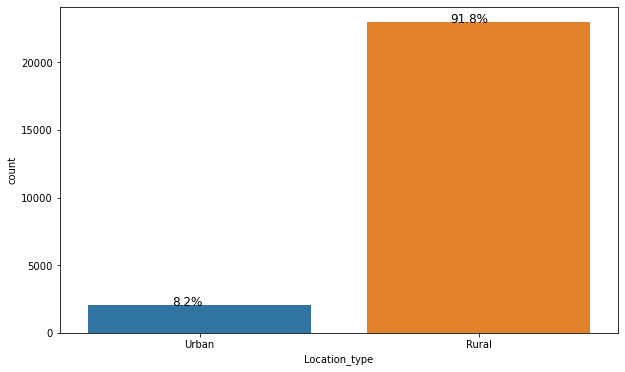

Number of records of each Category is:
Rural    22957
Urban     2043
Name: Location_type, dtype: int64


In [18]:
# How the warehouses are located between urban/Rural locations
plot_count_plot(df,'Location_type')
# We can see that almost 91.8% of the warehouses are located in the rural areas.

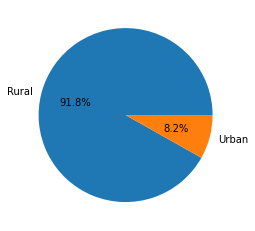

In [19]:
a=df['Location_type'].value_counts()
plt.pie(a,labels=a.index,autopct='%.01f%%',)
plt.show()

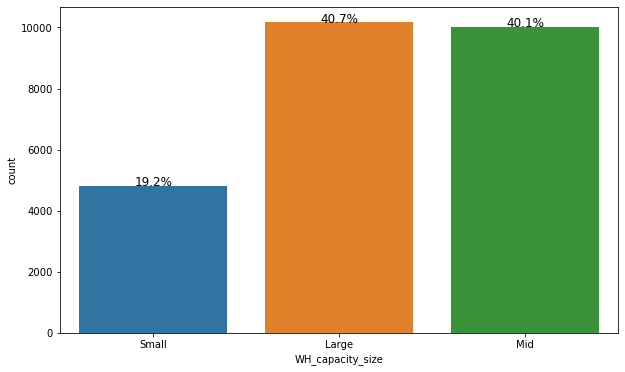

Number of records of each Category is:
Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64


In [20]:
# countplot for warehouse size
plot_count_plot(df,'WH_capacity_size')
# We can see that almost 40-40% of the warehouses are medium sized and large sized

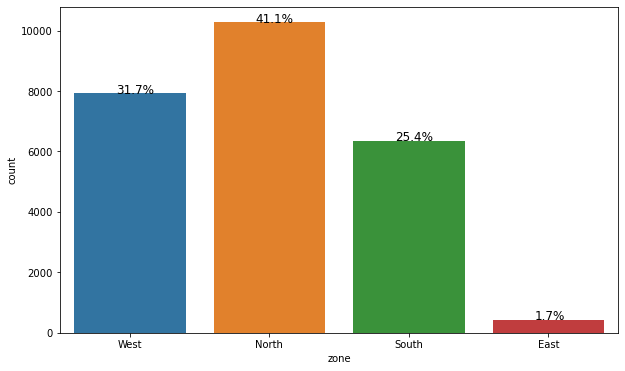

Number of records of each Category is:
North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64


In [21]:
# How the warehouses are locate accross different regions
plot_count_plot(df,'zone')
# We can see that there are very few warehouses located in the east regions i.e around 1.7%(429 warehouse)

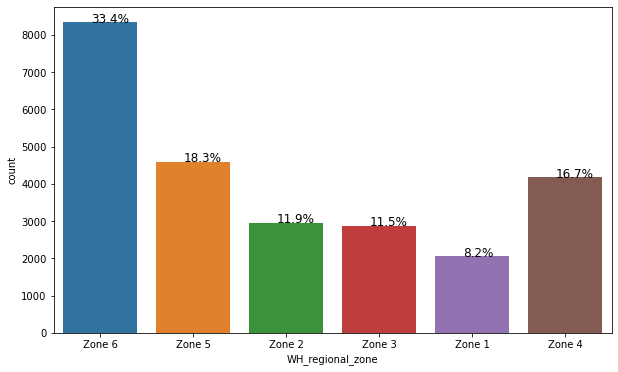

Number of records of each Category is:
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64


In [22]:
# countplot for warehouse regional zones. each of the 4 regions are divided into 6 regions
plot_count_plot(df,'WH_regional_zone')
# This plot is not much helpful as we don't know what is the distibution of loacation wise warehouse under these regions

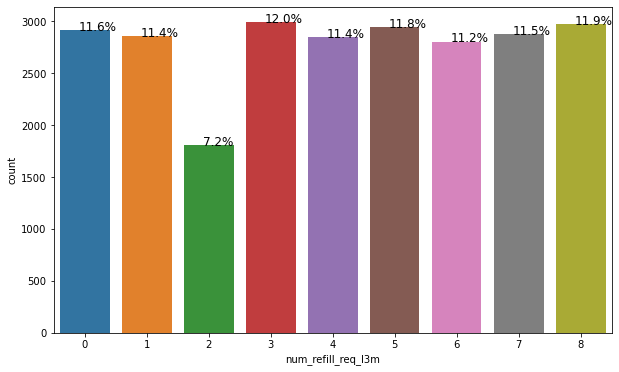

Number of records of each Category is:
3    2990
8    2970
5    2941
0    2912
7    2873
1    2856
4    2846
6    2804
2    1808
Name: num_refill_req_l3m, dtype: int64


In [23]:
# How many refills are done in the last 3 months
plot_count_plot(df,'num_refill_req_l3m')
# number of refills done are evenly distributed. E.g almost 11-12% of the ware house 0 refills and 
#same number of warehouse are there with 1,2,3,4 5,6,7,8 refills

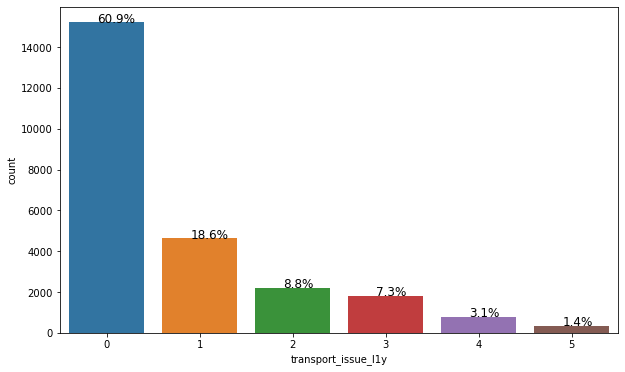

Number of records of each Category is:
0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: transport_issue_l1y, dtype: int64


In [24]:
# How many transport issues were faced in the last one year
plot_count_plot(df,'transport_issue_l1y')
# We can see that for 61% of the warehouse there are no transport issues and 
#about 18.8% and 8.8% of the warehouse faced 1 or 2 problems respectively. 
#There are 348 warehouse which faced transport issues 5 times which is very bad metric.

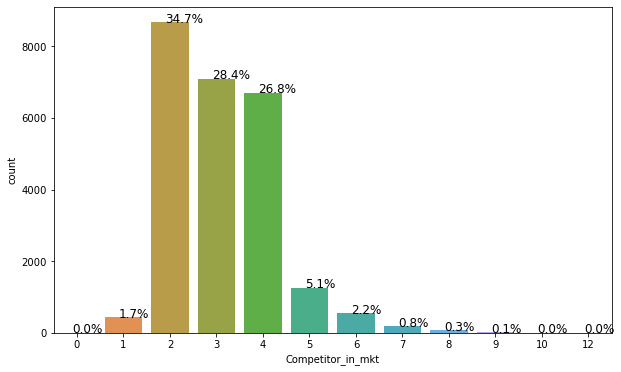

Number of records of each Category is:
2     8669
3     7094
4     6708
5     1265
6      546
1      432
7      189
8       76
9       13
10       6
12       1
0        1
Name: Competitor_in_mkt, dtype: int64


In [25]:
# How many competetors are there in the market
plot_count_plot(df,'Competitor_in_mkt')
# as per the below countplot about 90 % of the arehouse have only 2,3 or 4 others noodles avalable in the market

<AxesSubplot:xlabel='retail_shop_num', ylabel='Density'>

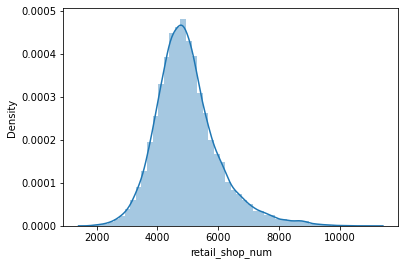

In [26]:
# How the number of retail shops distributed
sns.distplot(df['retail_shop_num'])
# we can see that the distribution is normally distributed.

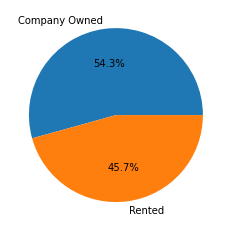

In [421]:
# countplot of owner type i.e company owned or rented
a=df['wh_owner_type'].value_counts()
plt.pie(a,labels=a.index,autopct='%.01f%%',)
plt.show()
# we have approx 45.7% of the warehouse whch are rented comare to 54.3% which are owned by company

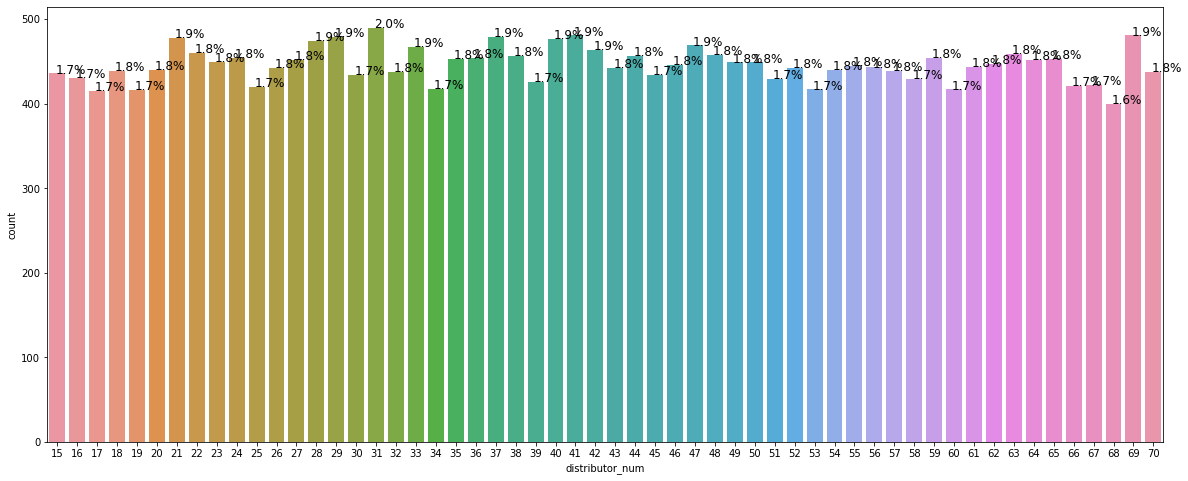

Number of records of each Category is:
31    490
41    481
69    481
37    479
29    479
21    478
40    477
28    474
47    469
33    467
42    464
22    460
63    459
48    458
38    457
44    457
36    454
24    454
59    454
35    453
65    453
64    452
27    452
23    450
49    449
50    449
62    447
46    446
55    445
61    444
56    443
43    442
52    442
26    442
20    440
54    440
57    439
18    439
70    438
32    438
15    436
30    434
45    434
16    431
58    429
51    429
39    426
67    422
66    421
25    420
34    418
60    417
53    417
19    416
17    415
68    400
Name: distributor_num, dtype: int64


In [28]:
# number of warehouse with distributor numbers
plot_count_plot(df,'distributor_num',figsize=(20,8))
# as per the below plot the the number of distributor is balanced. NO insights

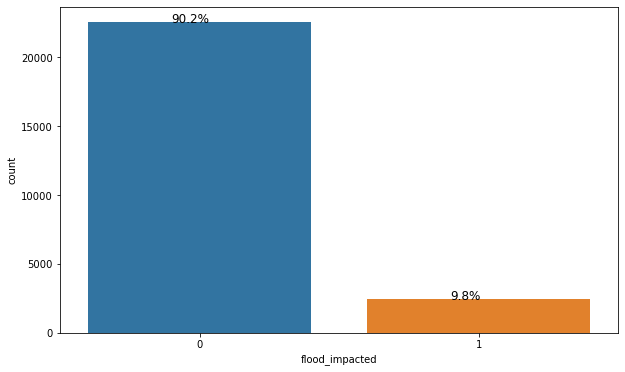

Number of records of each Category is:
0    22546
1     2454
Name: flood_impacted, dtype: int64


In [419]:
# Is the warehouse locted in flood impacted area
plot_count_plot(df,'flood_impacted')
# more then 90% of the warehouses are not located in flood impacted area.

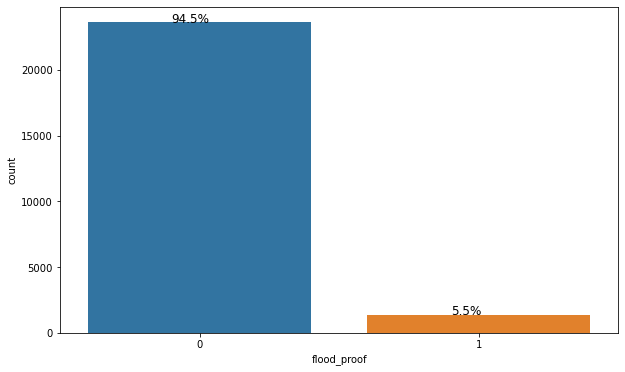

Number of records of each Category is:
0    23634
1     1366
Name: flood_proof, dtype: int64


In [30]:
# Is the warehouse floood proof or not
plot_count_plot(df,'flood_proof')
# We can see that 95% of the warehouse are not preapred for flood in case it comes.

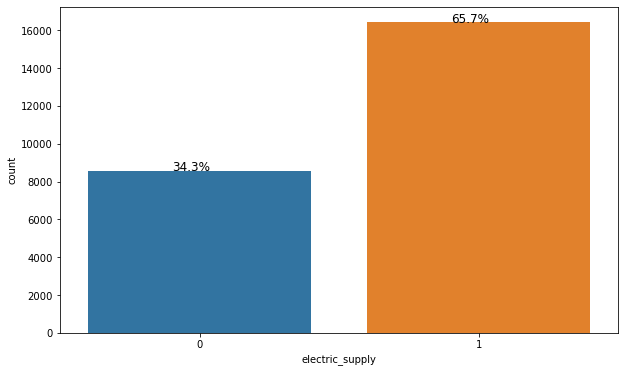

Number of records of each Category is:
1    16422
0     8578
Name: electric_supply, dtype: int64


In [31]:
# electric supply- Warehouse have powerbackup or not
plot_count_plot(df,'electric_supply')
# about 66% of the warehouses are having the power backup option available so they can do load shedding as well. 
# remaining 34.3% of the warehouse does not have any backups.

<AxesSubplot:xlabel='dist_from_hub', ylabel='Count'>

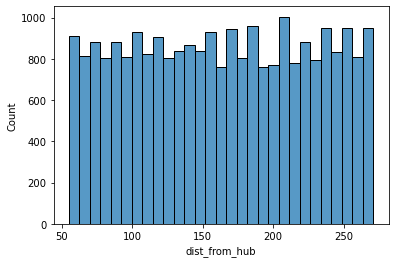

In [32]:
# how much distance is there between warehouse and hubs
sns.histplot(df['dist_from_hub'])
# Per the below we can see that number of warehouse euidistasnt from hub is eveny distributed

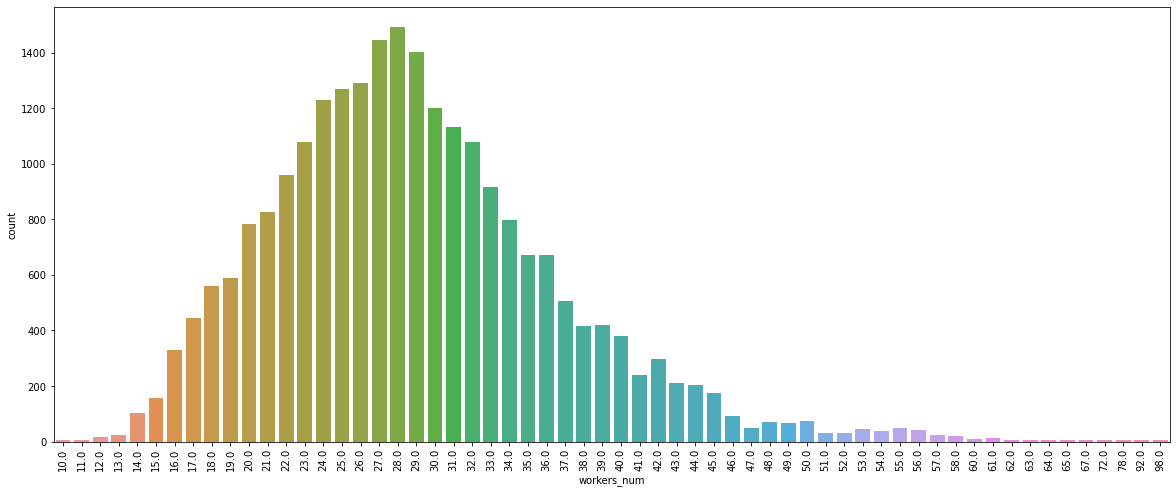

In [33]:
# How many workers are there in warehouses
plt.figure(figsize=(20,8))
sns.countplot(df['workers_num'])
plt.xticks(rotation=90)
plt.show()

# as per the below countplot we can see that the data for number of workers is normally distributed
#Also t=we can see the data is bit right skewed

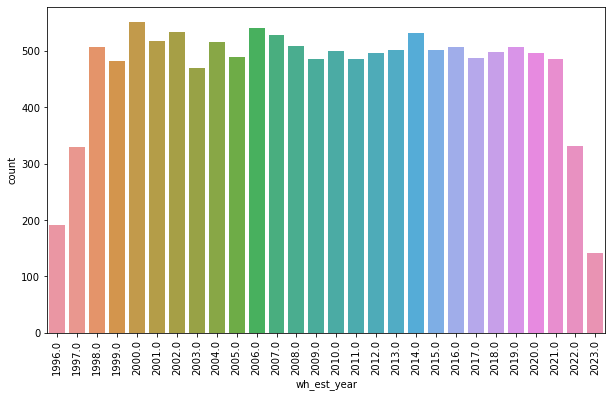

In [34]:
# Warehouse estabilished year
plt.figure(figsize=(10,6))
sns.countplot(df['wh_est_year'])
plt.xticks(rotation=90)
plt.show()
# out of the 25000 warehouses every year company has estabilished approx 500 warehouses.
#SO that mean the company is constanly expanding

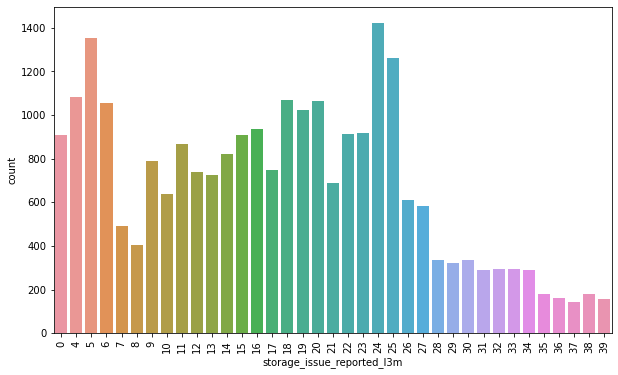

In [35]:
# Storage issues reported in last 3 months
plt.figure(figsize=(10,6))
sns.countplot(df['storage_issue_reported_l3m'])
plt.xticks(rotation=90)
plt.show()
# Althouhgh many warehouses have reported 0-10 storage issues there are a few which have faced
# a lot more storeage issues like ,ore then 30 so we shoudl definaltey analyse that why these few warehouses
# are facing so many storage issues in the past 3 months.

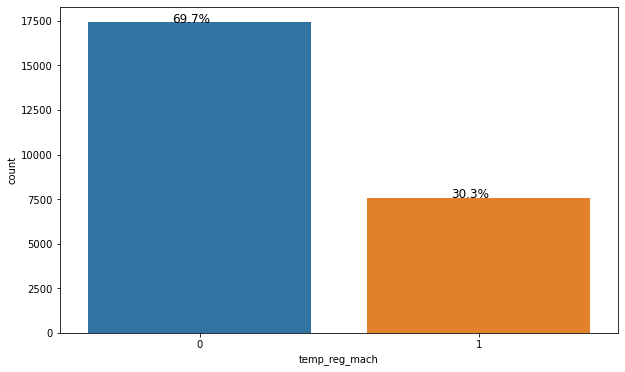

Number of records of each Category is:
0    17418
1     7582
Name: temp_reg_mach, dtype: int64


In [36]:
# Tempreature regulating machine indicators+
plot_count_plot(df,'temp_reg_mach')
# about 70% of the warehouses does not have a tempreature regulated machine and 30% does have it.

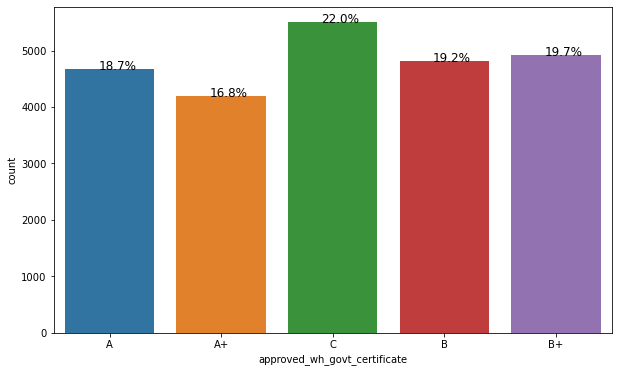

Number of records of each Category is:
C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64


In [37]:
# which govt appproved certificate doees the warehouses have
plot_count_plot(df,'approved_wh_govt_certificate')
# MOst of the warehouses have b or C govt certificates

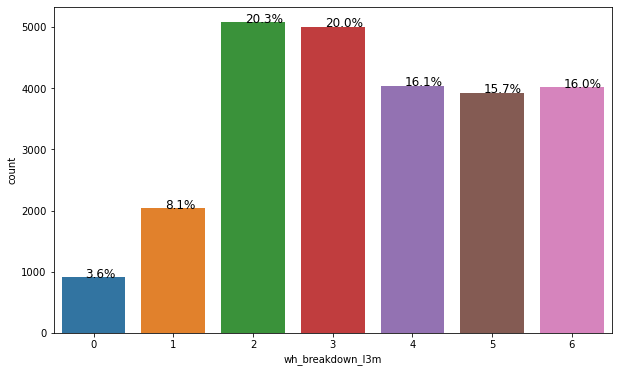

Number of records of each Category is:
2    5076
3    5006
4    4037
6    4012
5    3925
1    2036
0     908
Name: wh_breakdown_l3m, dtype: int64


In [38]:
# Warehouse faced a problem in last 3 months
plot_count_plot(df,'wh_breakdown_l3m')
# Mst of the warehouses have faced more then 2 problems 

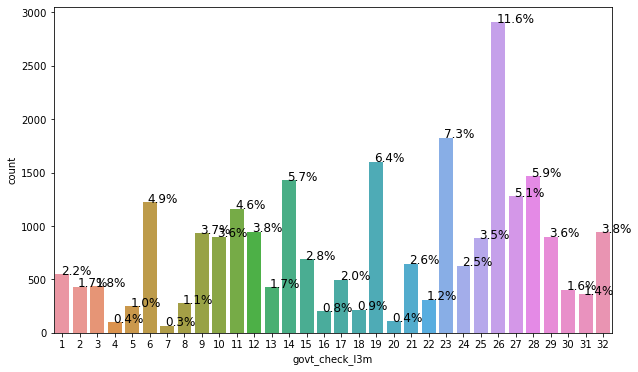

Number of records of each Category is:
26    2908
23    1828
19    1604
28    1465
14    1429
27    1277
6     1224
11    1160
12     947
32     940
9      932
29     901
10     899
25     884
15     689
21     649
24     628
1      550
17     497
3      438
2      431
13     429
30     404
31     362
22     309
8      276
5      250
18     217
16     201
20     108
4       99
7       65
Name: govt_check_l3m, dtype: int64


In [39]:
# Government checks happening in last 3 months
plot_count_plot(df,'govt_check_l3m')
# few of the warehouse the gove checks happendd more then 20 times as well

<AxesSubplot:xlabel='product_wg_ton', ylabel='Count'>

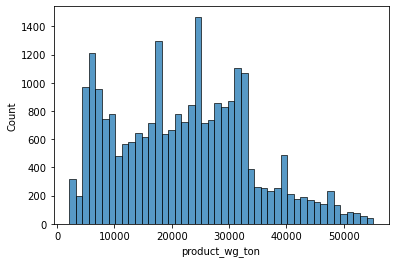

In [40]:
# See if is any imbalance in the dataset for target varaible
#df.drop('product_wg_ton_ln',axis=1,inplace=True)
sns.histplot((df['product_wg_ton']))

In [41]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

## Multivariate Analysis

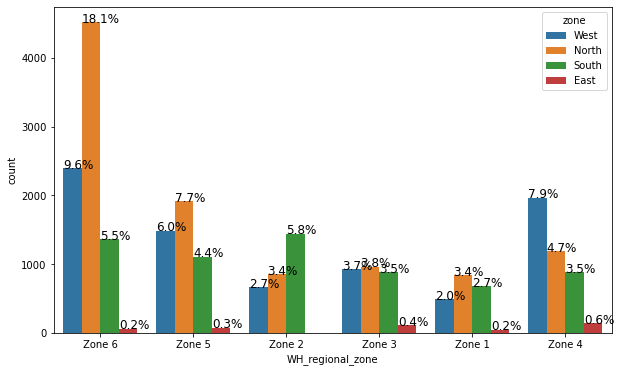

Number of records of each Category is:
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64


In [42]:
plot_count_plot(df,'WH_regional_zone',hue='zone')

<AxesSubplot:xlabel='zone', ylabel='product_wg_ton'>

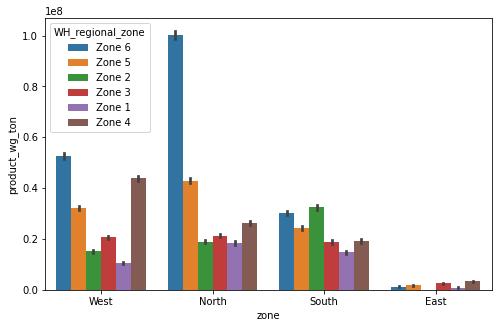

In [423]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['zone'],y=df['product_wg_ton'],estimator=sum,hue=df['WH_regional_zone'])
# North market is consuming maximum product and out of that zone6 is having the most product shipped.

<AxesSubplot:xlabel='zone', ylabel='storage_issue_reported_l3m'>

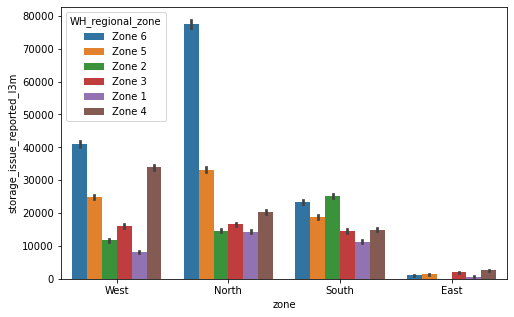

In [424]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['zone'],y=df['storage_issue_reported_l3m'],estimator=sum,hue=df['WH_regional_zone'])

<AxesSubplot:xlabel='workers_num', ylabel='WH_capacity_size'>

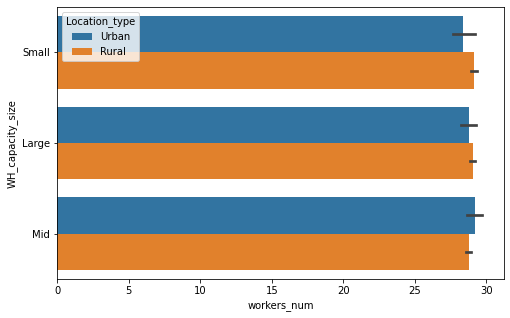

In [438]:
from numpy import median,mean
plt.figure(figsize=(8,5))
sns.barplot(y=df['WH_capacity_size'],x=df['workers_num'],estimator=mean,hue=df['Location_type'])

<AxesSubplot:xlabel='storage_issue_reported_l3m', ylabel='WH_capacity_size'>

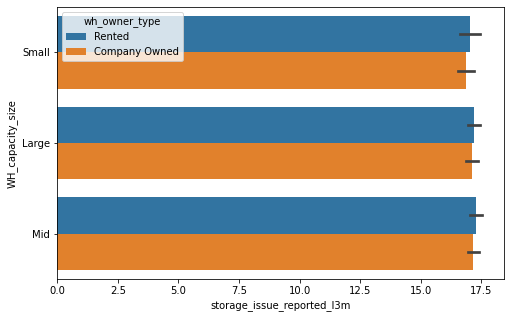

In [437]:
plt.figure(figsize=(8,5))
sns.barplot(y=df['WH_capacity_size'],x=df['storage_issue_reported_l3m'],estimator=mean,hue=df['wh_owner_type'])

<AxesSubplot:xlabel='zone', ylabel='retail_shop_num'>

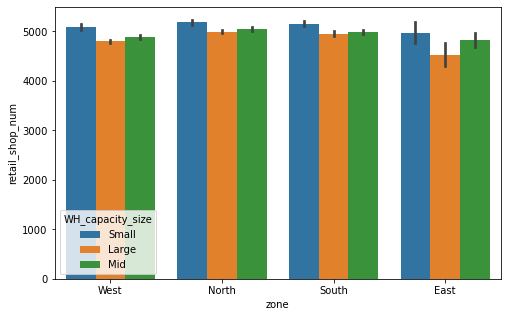

In [435]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['zone'],y=df['retail_shop_num'],estimator=mean,hue=df['WH_capacity_size'])

<AxesSubplot:xlabel='retail_shop_num', ylabel='product_wg_ton'>

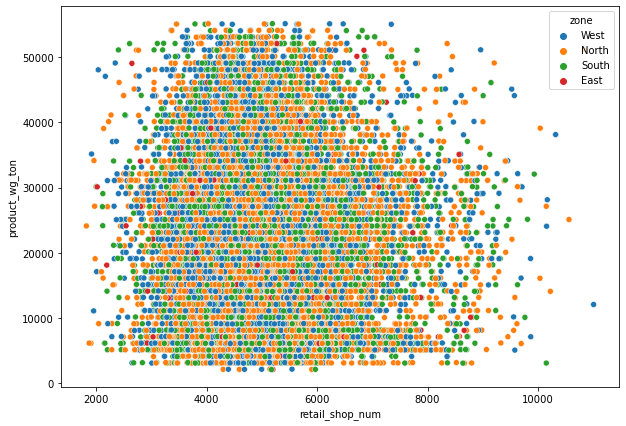

In [429]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['retail_shop_num'],y=df['product_wg_ton'],hue=df['zone'])

<AxesSubplot:xlabel='product_wg_ton', ylabel='dist_from_hub'>

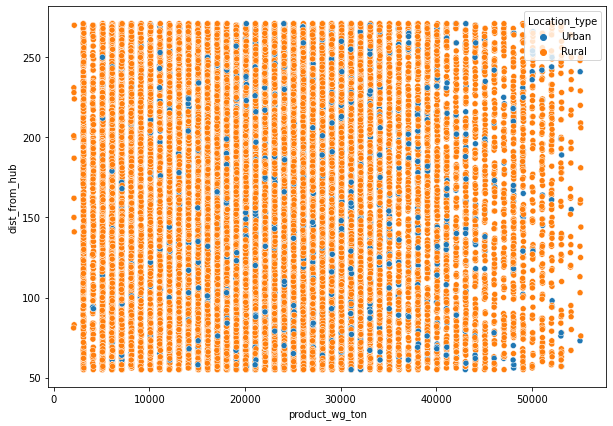

In [431]:

plt.figure(figsize=(10,7))
sns.scatterplot(x=df['product_wg_ton'],y=df['dist_from_hub'],hue=df['Location_type'])

<AxesSubplot:xlabel='storage_issue_reported_l3m', ylabel='approved_wh_govt_certificate'>

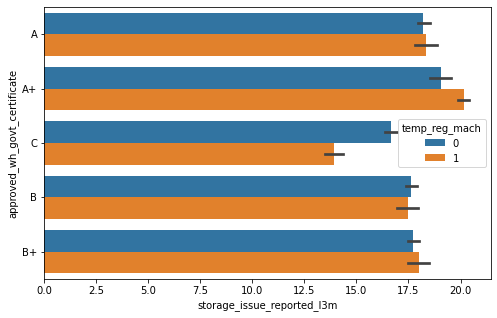

In [436]:
plt.figure(figsize=(8,5))
sns.barplot(y=df['approved_wh_govt_certificate'],x=df['storage_issue_reported_l3m'],estimator=mean,hue=df['temp_reg_mach'])

<AxesSubplot:xlabel='product_wg_ton', ylabel='storage_issue_reported_l3m'>

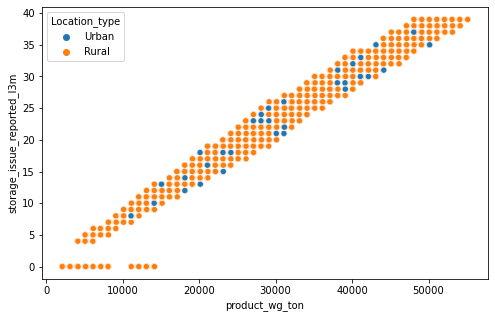

In [433]:

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['product_wg_ton'],y=df['storage_issue_reported_l3m'],hue=df['Location_type'])
# There is a linear relationship between storage issue reported and product_wg_ton. It is having a positive correlation

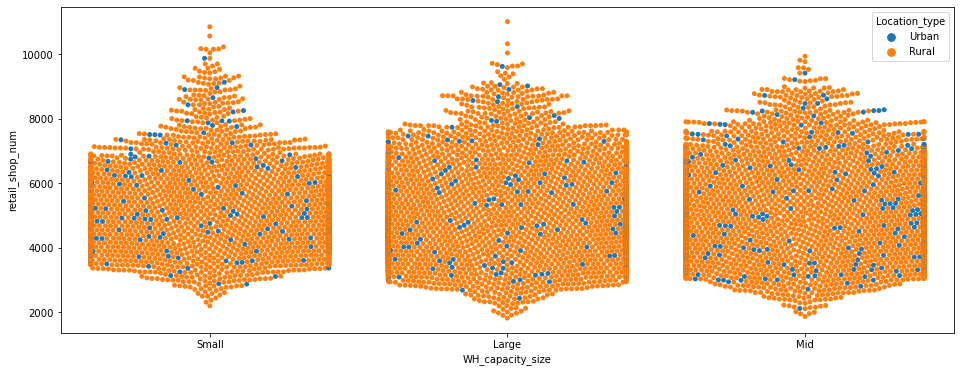

In [413]:
plt.figure(figsize = (16,6))
sns.swarmplot(y = 'retail_shop_num', x = 'WH_capacity_size', data = df, hue = 'Location_type')
plt.show()

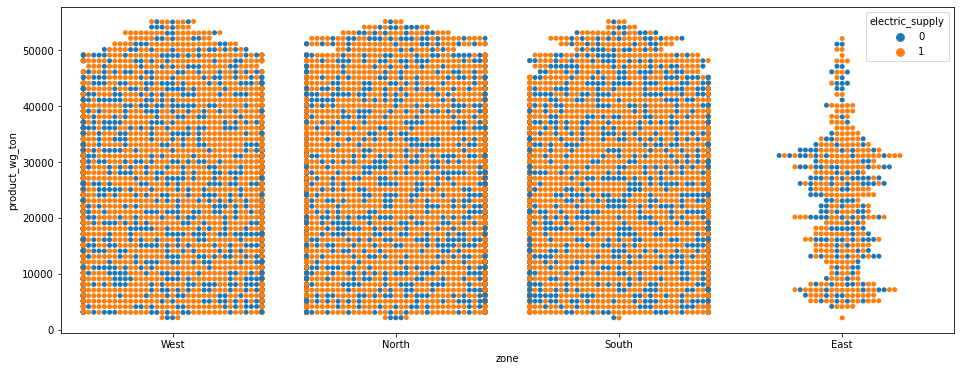

In [414]:
plt.figure(figsize = (16,6))
sns.swarmplot(y = 'product_wg_ton', x = 'zone', data = df, hue = 'electric_supply')
plt.show()

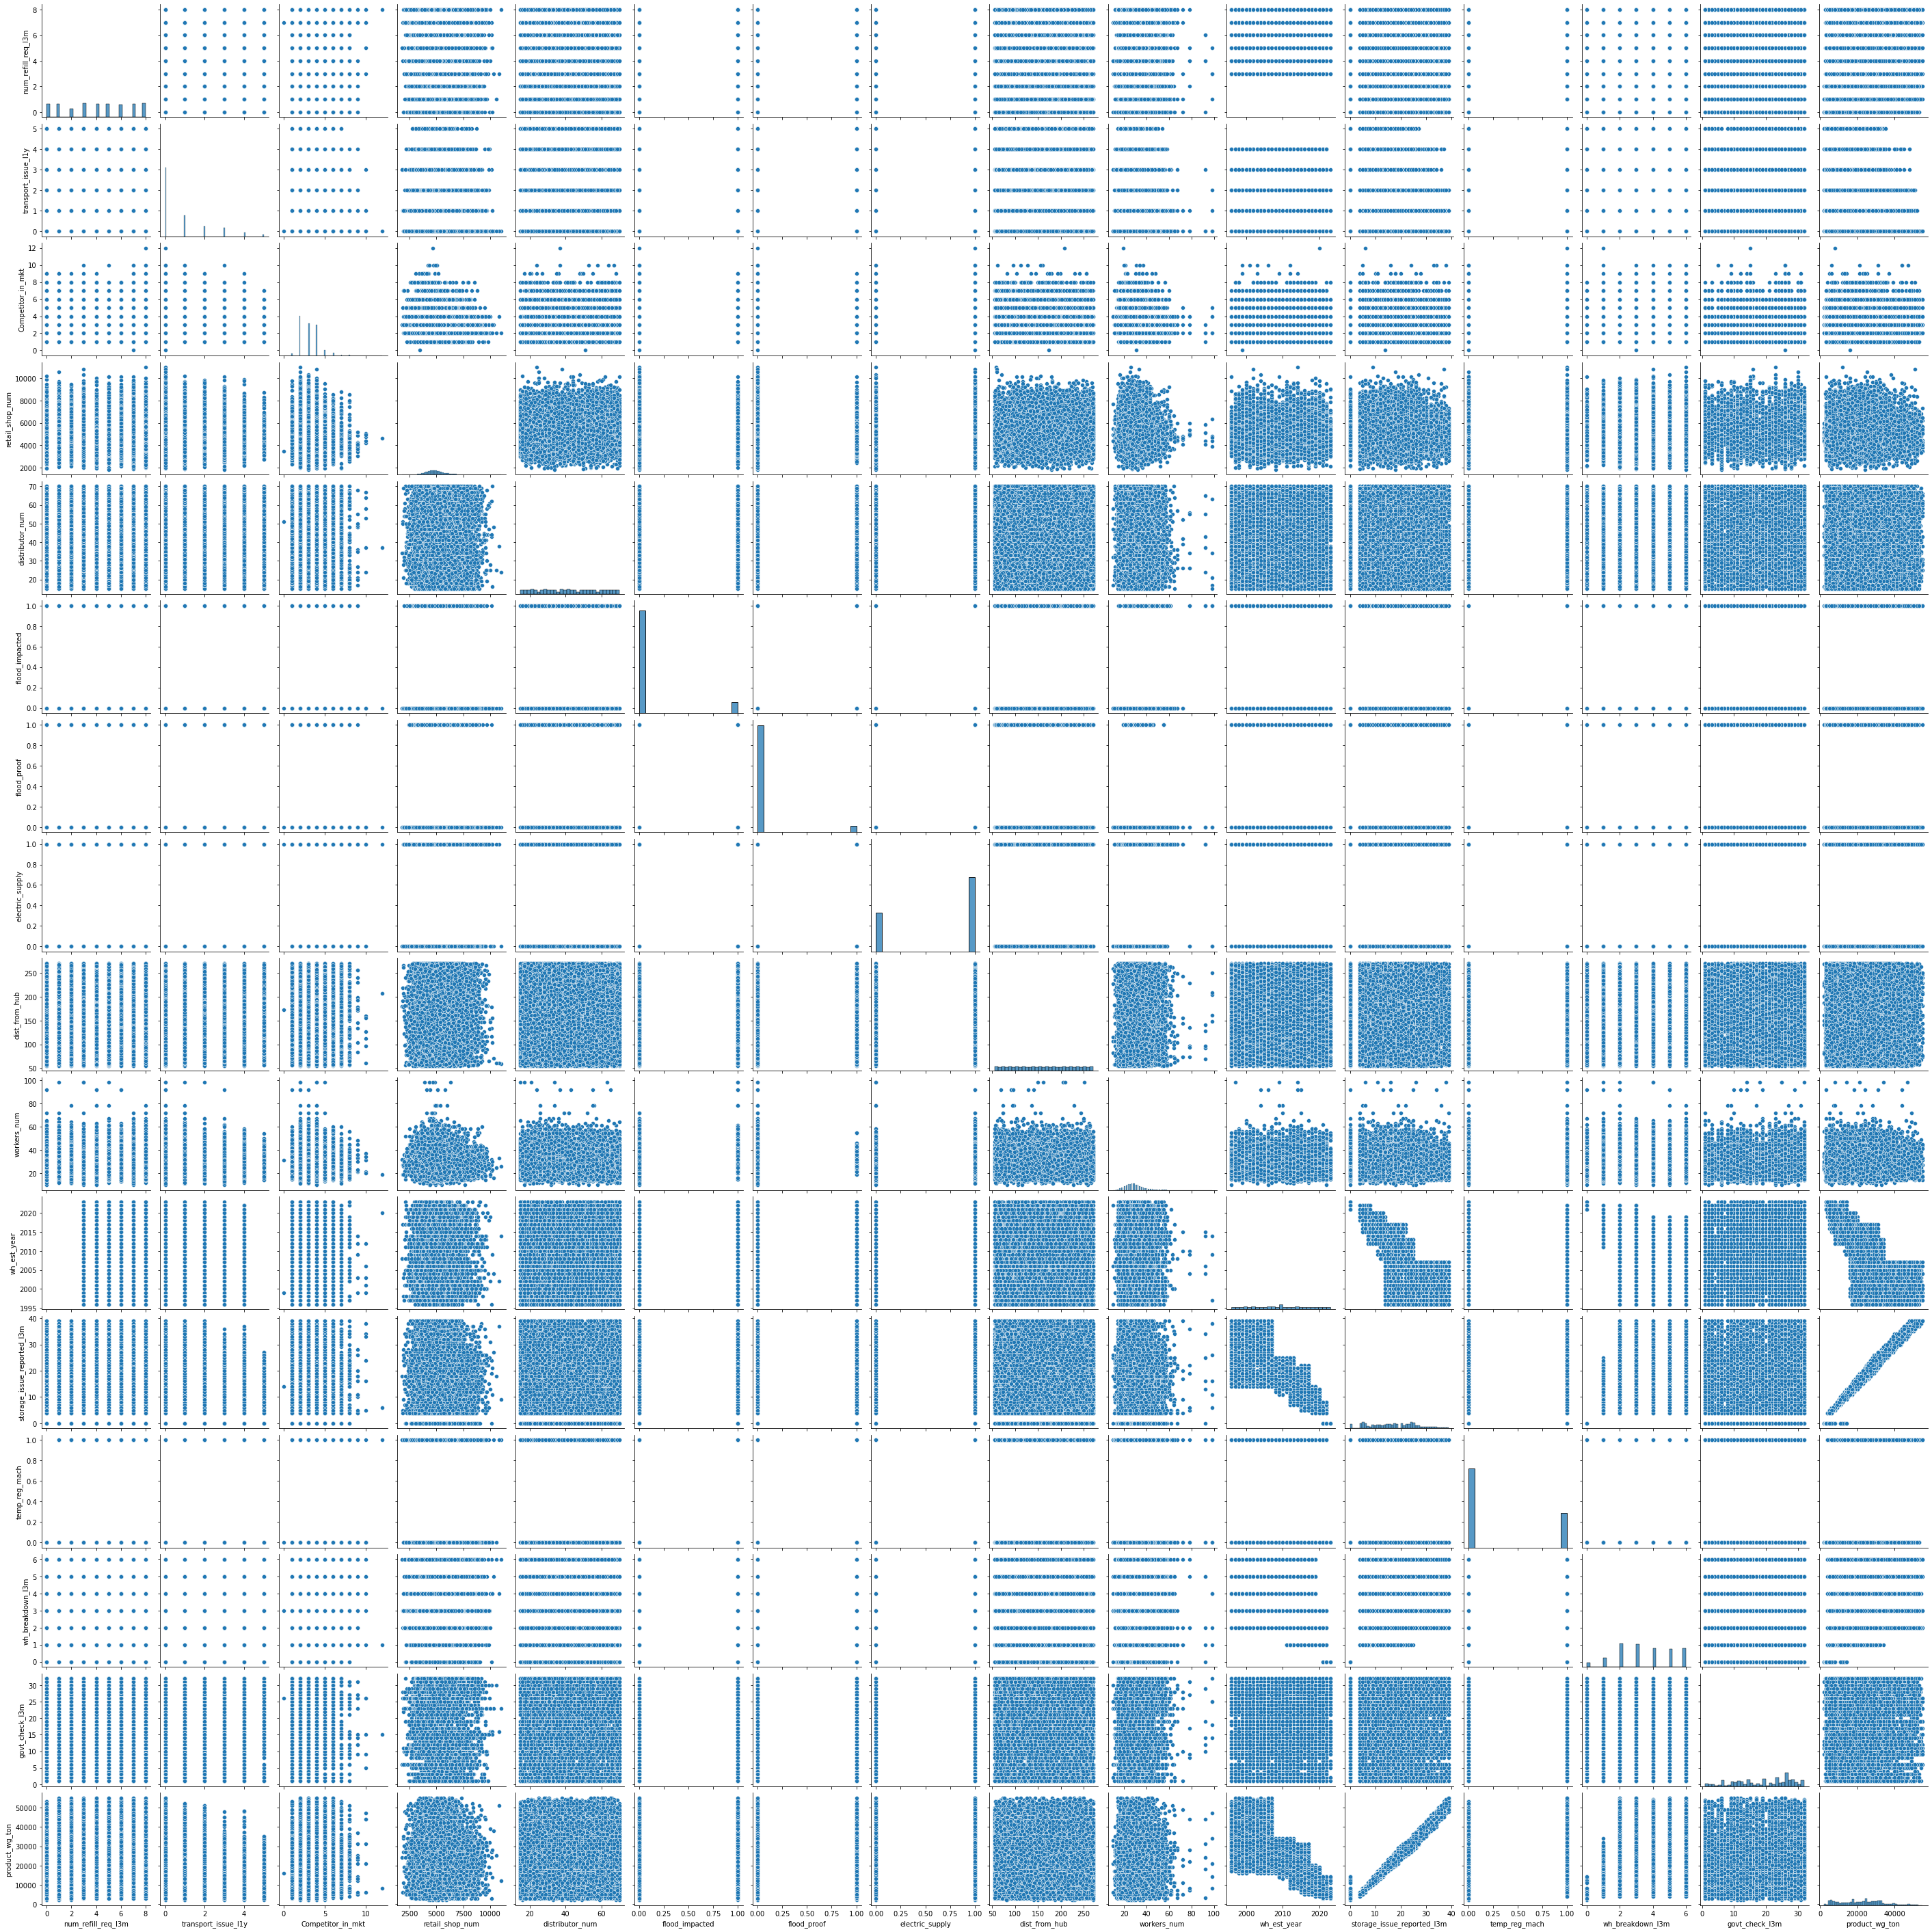

In [43]:
sns.pairplot(df)

## Preprocessing the data

In [445]:
df.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        25000.000000         25000.000000       25000.000000   
mean             4.089040             0.773680           3.104200   
std              2.606612             1.199449           1.141663   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     25000.000000     25000.000000    25000.000000  25000.000000   
mean       4985.711560        42.418120        0.098160      0.054640   
std        1052.825252        16.064329        0.297537      0.227281   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4313.000000        29.000000        0.000000      0.000000   
50%        4859.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num   wh_est_year  \
count     25000.000000   25000.000000  24010.000000  13119.000000   
mean          0.656880     163.537320     28.944398   2009.383185   
std           0.474761      62.718609      7.872534      7.528230   
min           0.000000      55.000000     10.000000   1996.000000   
25%           0.000000     109.000000     24.000000   2003.000000   
50%           1.000000     164.000000     28.000000   2009.000000   
75%           1.000000     218.000000     33.000000   2016.000000   
max           1.000000     271.000000     98.000000   2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                25000.000000   25000.000000      25000.000000   
mean                    17.130440       0.303280          3.482040   
std                      9.161108       0.459684          1.690335   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    25000.000000    25000.000000  
mean        18.812280    22102.632920  
std          8.632382    11607.755077  
min          1.000000     2065.000000  
25%         11.000000    13059.000000  
50%         21.000000    22101.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

In [446]:
df.isnull().sum()/df.shape[0]*100

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [447]:
# we can see that workers_num and approved_wh_govt_certificate is having some 3-4% null values
#so we will replace the null value as below:
# For Workers num we are going to append the null values with median values as our data is little right skewed. 
# We have mean value as approx 29 workers and median is 28 workers 

df['workers_num']=df['workers_num'].fillna(df['workers_num'].median())


In [448]:
# work Govt certificate we are going to fill with mode values
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna('C')   # as C is the mode value

In [449]:
# Around 47% of the data is null for workhouse establised year- so we are going to drop that variable
df=df.drop('wh_est_year',axis=1)

In [450]:
df.isnull().sum()
# now we dont have any null values

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [451]:
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   storage_issue_reported_l3m  temp_reg_mach approved_wh_govt_certificate  \
0                          13              0                            A   
1                           4              0                            A   
2                          17              0                            A   
3                          17              1                           A+   
4                          18              0                            C   

   wh_breakdown_l3m  govt_check_l3m  product_wg_ton  
0                 5              15           17115  
1                 3              17            5074  
2                 6              22           23137  
3                 3              27           22115  
4                 6              24           24071

In [452]:
# Dropping the warehouse ID,Warehouse Manager ID- as these will not be significant in predicting
#        the target variable i.e product_wg_ton
# Dropping the owner type as it will not matter that whether a warehouse is rented or company owned in determining the 
#       optimum quantity of the supply required.
df.drop(['Ware_house_ID','WH_Manager_ID','wh_owner_type'],axis=1,inplace=True)

In [453]:
print(df.shape)
df.head()

(25000, 20)


Location_type WH_capacity_size   zone WH_regional_zone  num_refill_req_l3m  \
0         Urban            Small   West           Zone 6                   3   
1         Rural            Large  North           Zone 5                   0   
2         Rural              Mid  South           Zone 2                   1   
3         Rural              Mid  North           Zone 3                   7   
4         Rural            Large  North           Zone 5                   3   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  distributor_num  \
0                    1                  2             4651               24   
1                    0                  4             6217               47   
2                    0                  4             4306               64   
3                    4                  2             6000               50   
4                    1                  2             4740               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   storage_issue_reported_l3m  temp_reg_mach approved_wh_govt_certificate  \
0                          13              0                            A   
1                           4              0                            A   
2                          17              0                            A   
3                          17              1                           A+   
4                          18              0                            C   

   wh_breakdown_l3m  govt_check_l3m  product_wg_ton  
0                 5              15           17115  
1                 3              17            5074  
2                 6              22           23137  
3                 3              27           22115  
4                 6              24           24071

In [454]:
# one-hot encoding for locationn-type as these can't be ordered. 
df=pd.get_dummies(df,columns=['Location_type','zone','WH_regional_zone'])

In [455]:
# We will do label encoding for Capacity-size as the capacity size is ordered and shoudl have some weight.
#Govt certificate is ordered so we can use label encoding
df['WH_capacity_size']=df['WH_capacity_size'].map({'Small':0,'Mid':1,'Large':2})
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].map({'C':0,'B':1,'B+':2,'A':3,'A+':4})

In [456]:
# Dropping 1 column from each dummy to avoid multicolinearity as other columns already captures the details.
df.drop(columns=['Location_type_Urban','zone_West','WH_regional_zone_Zone 6'],inplace=True)

In [457]:
print(df.shape)
df.head()


(25000, 26)


WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                 0                   3                    1   
1                 2                   0                    0   
2                 1                   1                    0   
3                 1                   7                    4   
4                 2                   3                    1   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                  2             4651               24               0   
1                  4             6217               47               0   
2                  4             4306               64               0   
3                  2             6000               50               0   
4                  2             4740               42               1   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0            1                1             91         29.0   
1            0                1            210         31.0   
2            0                0            161         37.0   
3            0                0            103         21.0   
4            0                1            112         25.0   

   storage_issue_reported_l3m  temp_reg_mach  approved_wh_govt_certificate  \
0                          13              0                             3   
1                           4              0                             3   
2                          17              0                             3   
3                          17              1                             4   
4                          18              0                             0   

   wh_breakdown_l3m  govt_check_l3m  product_wg_ton  Location_type_Rural  \
0                 5              15           17115                    0   
1                 3              17            5074                    1   
2                 6              22           23137                    1   
3                 3              27           22115                    1   
4                 6              24           24071                    1   

   zone_East  zone_North  zone_South  WH_regional_zone_Zone 1  \
0          0           0           0                        0   
1          0           1           0                        0   
2          0           0           1                        0   
3          0           1           0                        0   
4          0           1           0                        0   

   WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        1                        0                        0   
3                        0                        1                        0   
4                        0                        0                        0   

   WH_regional_zone_Zone 5  
0                        0  
1                        1  
2                        0  
3                        0  
4                        1

In [458]:
# MOve the target column to the last
import movecolumn as mc
mc.MoveToLast(df,'product_wg_ton')
df.head()

WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                 0                   3                    1   
1                 2                   0                    0   
2                 1                   1                    0   
3                 1                   7                    4   
4                 2                   3                    1   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                  2             4651               24               0   
1                  4             6217               47               0   
2                  4             4306               64               0   
3                  2             6000               50               0   
4                  2             4740               42               1   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0            1                1             91         29.0   
1            0                1            210         31.0   
2            0                0            161         37.0   
3            0                0            103         21.0   
4            0                1            112         25.0   

   storage_issue_reported_l3m  temp_reg_mach  approved_wh_govt_certificate  \
0                          13              0                             3   
1                           4              0                             3   
2                          17              0                             3   
3                          17              1                             4   
4                          18              0                             0   

   wh_breakdown_l3m  govt_check_l3m  Location_type_Rural  zone_East  \
0                 5              15                    0          0   
1                 3              17                    1          0   
2                 6              22                    1          0   
3                 3              27                    1          0   
4                 6              24                    1          0   

   zone_North  zone_South  WH_regional_zone_Zone 1  WH_regional_zone_Zone 2  \
0           0           0                        0                        0   
1           1           0                        0                        0   
2           0           1                        0                        1   
3           1           0                        0                        0   
4           1           0                        0                        0   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                        0                        0                        0   
1                        0                        0                        1   
2                        0                        0                        0   
3                        1                        0                        0   
4                        0                        0                        1   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

## Check for Outliers

In [58]:
cols=['num_refill_req_l3m','transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num','distributor_num',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m','wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton']

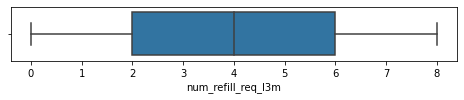

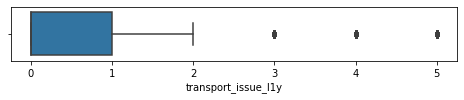

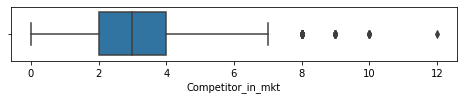

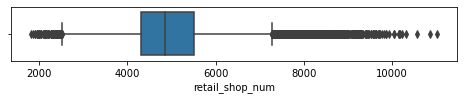

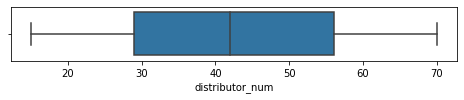

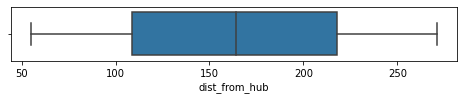

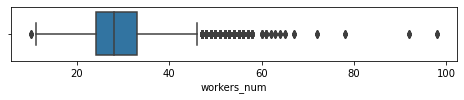

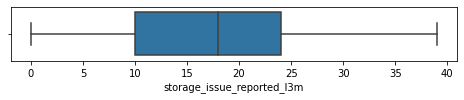

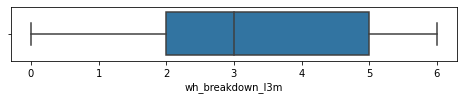

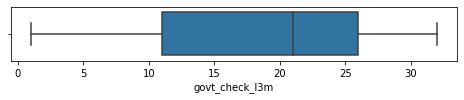

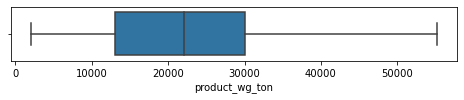

In [443]:
# plotting to see if any outliers are there in the data
for values in cols:
    plt.figure(figsize=(8,1))
    sns.boxplot(data=df,x=values)

# there are few outliers in transport_issue_l1y,Competitor_in_mkt,retail_shop_num and workers_num 
#but we are not gonna delete then as they represent natural variations in the population and they should be left as is.
#We can call them as True outliers

In [ ]:
for values in cols:
    plt.figure(figsize=(8,1))
    plt.boxplot(data=df,, vert=False)

In [60]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# pos_outlier = Q3 + 1.5*IQR
# neg_outlier = Q1 - 1.5*IQR
# print(Q1)
# print("*************************************")
# print(Q3)
# print("*************************************")
# print(IQR)
# print("*************************************")
# print(pos_outlier)
# print("*************************************")
# print(neg_outlier)
# print("*************************************")

In [61]:
# if we need to handle outlier we can do in the following ways:
# Handling outlier part
# Q1_Competitor_in_mkt=df["Competitor_in_mkt"].quantile(0.25)
# Q3_Competitor_in_mkt=df["Competitor_in_mkt"].quantile(0.75)
# IQR1=Q3_Competitor_in_mkt-Q1_Competitor_in_mkt
# upper_limit_Competitor_in_mkt=int(Q3_Competitor_in_mkt+1.5*IQR1)
# print("upper_limit_Competitor_in_mkt",upper_limit_Competitor_in_mkt)
# lower_limit_Competitor_in_mkt=int(Q1_Competitor_in_mkt-1.5*IQR1)
# print("lower_limit_Competitor_in_mkt",lower_limit_Competitor_in_mkt)

# Q1_retail_shop_num=df["retail_shop_num"].quantile(0.25)
# Q3_retail_shop_num=df["retail_shop_num"].quantile(0.75)
# IQR2=(Q3_retail_shop_num-Q1_retail_shop_num)
# upper_limit_retail_shop_num=int(Q3_retail_shop_num+1.5*IQR2)
# print("upper_limit_retail_shop_num",upper_limit_retail_shop_num)
# lower_limit_retail_shop_num=int(Q1_retail_shop_num-1.5*IQR2)
# print("lower_limit_retail_shop_num",lower_limit_retail_shop_num)

# Q1_workers_num=df["workers_num"].quantile(0.25)
# Q3_workers_num=df["workers_num"].quantile(0.75)
# IQR3=(Q3_workers_num-Q1_workers_num)
# upper_limit_workers_num=int(Q3_workers_num+1.5*IQR3)
# print("upper_limit_workers_num",upper_limit_workers_num)
# lower_limit_workers_num=int(Q1_workers_num-1.5*IQR3)
# print("lower_limit_workers_num",lower_limit_workers_num)

# Q1_transport_issue_l1y=df["transport_issue_l1y"].quantile(0.25)
# Q3_transport_issue_l1y=df["transport_issue_l1y"].quantile(0.75)
# IQR4=(Q3_transport_issue_l1y-Q1_transport_issue_l1y)
# upper_limit_transport_issue_l1y=int(Q3_transport_issue_l1y+1.5*IQR4)
# print("upper_limit_transport_issue_l1y",upper_limit_transport_issue_l1y)
# lower_limit_transport_issue_l1y=int(Q1_transport_issue_l1y-1.5*IQR4)
# print("lower_limit_transport_issue_l1y",lower_limit_transport_issue_l1y)


In [62]:
# df=df[~((df['Competitor_in_mkt']<lower_limit_Competitor_in_mkt)|
#           (df['Competitor_in_mkt']>upper_limit_Competitor_in_mkt))]
# df=df[~((df['workers_num']<lower_limit_workers_num)|
#           (df['workers_num']>upper_limit_workers_num))]

In [63]:
# df['retail_shop_num']=np.where(df['retail_shop_num']>upper_limit_retail_shop_num,upper_limit_retail_shop_num,
#                                 np.where(df['retail_shop_num']<lower_limit_retail_shop_num,lower_limit_retail_shop_num,
#                                          df['retail_shop_num']))

In [64]:
df.shape

(25000, 26)

In [65]:
df.head(2)

WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                 0                   3                    1   
1                 2                   0                    0   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                  2             4651               24               0   
1                  4             6217               47               0   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0            1                1             91         29.0   
1            0                1            210         31.0   

   storage_issue_reported_l3m  temp_reg_mach  approved_wh_govt_certificate  \
0                          13              0                             3   
1                           4              0                             3   

   wh_breakdown_l3m  govt_check_l3m  Location_type_Rural  zone_North  \
0                 5              15                    0           0   
1                 3              17                    1           1   

   zone_South  zone_West  WH_regional_zone_Zone 1  WH_regional_zone_Zone 2  \
0           0          1                        0                        0   
1           0          0                        0                        0   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                        0                        0                        0   
1                        0                        0                        1   

   product_wg_ton  
0           17115  
1            5074

## Check for Correlation

<AxesSubplot:>

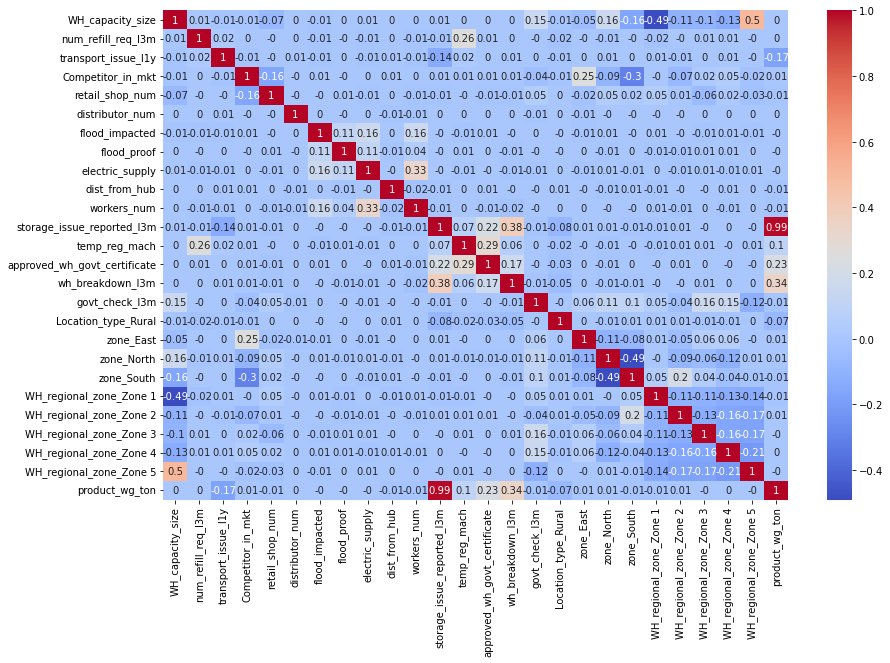

In [463]:
plt.figure(figsize=(14,9))
sns.heatmap(data=df.corr().round(2), annot=True,cmap='coolwarm')
# there is very less correlation between variables so we need to see if any insignificant variable needs to be dropped.
# We will build the model and then tune it in order to increase accuracy.
# there is a very-very high corelation between the target varibale and storage issue reported in last 3 months. 
# so there is a possibility that this variable is only controlling the target variable.
# We may also have to drop this variable to see the impact of this variable on our model.

<AxesSubplot:xlabel='product_wg_ton', ylabel='Density'>

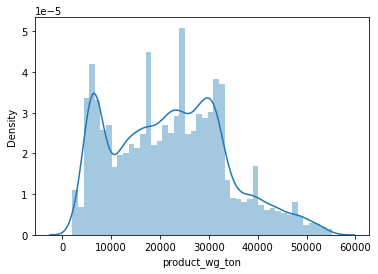

In [264]:
sns.distplot(df['product_wg_ton']) 

## Splitting the data into dependent and independent variables


In [349]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
print(X.shape)
X.head(2)

(25000, 25)


WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                 0                   3                    1   
1                 2                   0                    0   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                  2             4651               24               0   
1                  4             6217               47               0   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0            1                1             91         29.0   
1            0                1            210         31.0   

   storage_issue_reported_l3m  temp_reg_mach  approved_wh_govt_certificate  \
0                          13              0                             3   
1                           4              0                             3   

   wh_breakdown_l3m  govt_check_l3m  Location_type_Rural  zone_East  \
0                 5              15                    0          0   
1                 3              17                    1          0   

   zone_North  zone_South  WH_regional_zone_Zone 1  WH_regional_zone_Zone 2  \
0           0           0                        0                        0   
1           1           0                        0                        0   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  
0                        0                        0                        0  
1                        0                        0                        1

In [87]:
print(Y.shape)
Y.head()

(25000,)


0    17115
1     5074
2    23137
3    22115
4    24071
Name: product_wg_ton, dtype: int64

In [350]:
## We will do statndardization as regression models gets affected by weights
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(X)
x_scaled

array([[-1.63254736, -0.41780748,  0.18869048, ..., -0.36090166,
        -0.44781452, -0.47403559],
       [ 1.05627825, -1.56874998, -0.64504266, ..., -0.36090166,
        -0.44781452,  2.10954623],
       [-0.28813455, -1.18510248, -0.64504266, ..., -0.36090166,
        -0.44781452, -0.47403559],
       ...,
       [ 1.05627825,  1.11678253, -0.64504266, ..., -0.36090166,
        -0.44781452,  2.10954623],
       [-1.63254736, -1.18510248, -0.64504266, ..., -0.36090166,
        -0.44781452, -0.47403559],
       [-0.28813455,  1.50043003,  1.02242363, ..., -0.36090166,
         2.23306741, -0.47403559]])

In [351]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaled
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]
vif['Features'] = X.columns
vif
# All the VIF are less then 5 so we can say there is no issue of multicollinearity in the data.

Variance Inflation Factor                      Features
0                    2.266296              WH_capacity_size
1                    1.080260            num_refill_req_l3m
2                    1.029377           transport_issue_l1y
3                    1.278546             Competitor_in_mkt
4                    1.041958               retail_shop_num
5                    1.000806               distributor_num
6                    1.050931                flood_impacted
7                    1.022397                   flood_proof
8                    1.153066               electric_supply
9                    1.001136                 dist_from_hub
10                   1.140895                   workers_num
11                   1.237264    storage_issue_reported_l3m
12                   1.181116                 temp_reg_mach
13                   1.158043  approved_wh_govt_certificate
14                   1.184730              wh_breakdown_l3m
15                   1.337161                govt_check_l3m
16                   1.008094           Location_type_Rural
17                   1.097161                     zone_East
18                   1.578407                    zone_North
19                   1.736367                    zone_South
20                   1.737584       WH_regional_zone_Zone 1
21                   1.292264       WH_regional_zone_Zone 2
22                   1.341702       WH_regional_zone_Zone 3
23                   1.455538       WH_regional_zone_Zone 4
24                   1.581409       WH_regional_zone_Zone 5

### Split the Data into train and test

In [352]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.2,random_state=101)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
# We have 20k records in the train data and 5k records in the tets data.

(20000, 25) (20000,) (5000, 25) (5000,)


### Model-1(Linear Regression)

In [353]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [354]:
print('Linear Model Coefficient is:',linear_model.coef_)
print('Linear Model Intercept is:',linear_model.intercept_)
coef = pd.DataFrame(linear_model.coef_, X.columns, columns = ['Coefficients'])
coef

Linear Model Coefficient is: [-2.43846257e+01 -3.57163370e-01 -3.63544800e+02 -1.27425123e+01
 -1.11069666e+01  3.27062669e+01  6.77746507e+00  2.66047993e+01
 -1.01270212e+01  1.17190743e+01 -4.87377504e+00  1.14902588e+04
  4.00564613e+02  1.57015604e+02 -4.01880605e+02 -1.34975308e+01
  1.34617133e+01 -4.93996328e+00  2.16351826e+01 -1.22096089e+01
  1.31458446e+00  4.90642473e+00 -5.05894862e+00 -2.16475195e-01
  3.18678010e+00]
Linear Model Intercept is: 22102.752505910055


Coefficients
WH_capacity_size                -24.384626
num_refill_req_l3m               -0.357163
transport_issue_l1y            -363.544800
Competitor_in_mkt               -12.742512
retail_shop_num                 -11.106967
distributor_num                  32.706267
flood_impacted                    6.777465
flood_proof                      26.604799
electric_supply                 -10.127021
dist_from_hub                    11.719074
workers_num                      -4.873775
storage_issue_reported_l3m    11490.258791
temp_reg_mach                   400.564613
approved_wh_govt_certificate    157.015604
wh_breakdown_l3m               -401.880605
govt_check_l3m                  -13.497531
Location_type_Rural              13.461713
zone_East                        -4.939963
zone_North                       21.635183
zone_South                      -12.209609
WH_regional_zone_Zone 1           1.314584
WH_regional_zone_Zone 2           4.906425
WH_regional_zone_Zone 3          -5.058949
WH_regional_zone_Zone 4          -0.216475
WH_regional_zone_Zone 5           3.186780

In [355]:
#Evaluation metrics to find accuracy/r-square value
from sklearn.metrics import r2_score
y_pred_train=linear_model.predict(x_train)
print('Training Accuracy is:',r2_score(y_train,y_pred_train)*100,'%')
y_pred_test=linear_model.predict(x_test)
print('Test Accuracy is:',r2_score(y_pred_test,y_test)*100,'%')

Training Accuracy is: 97.6973585542594 %
Test Accuracy is: 97.73447054594612 %


In [357]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, y_pred_test))
print("##################"*5)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("##################"*5)
print('MAE', metrics.mean_absolute_error(y_test, y_pred_test))
print("##################"*5)
print('MAPE', metrics.mean_absolute_percentage_error(y_test, y_pred_test))

MSE 2988679.3855874487
##########################################################################################
RMSE 1728.77973888736
##########################################################################################
MAE 1279.5280662763423
##########################################################################################
MAPE 0.08940175620811046


In [ ]:
# Our accuracy is coming good and there is no overfitting as accuracy is almost similar for both train and test.

### OLS Method- Ordinary Least square

In [106]:
# OLS method as it gives us statistical details. Its there in the statsmodel Package
# Unlike sklearn that adds an intercept to our data for the best fit,statsmodel doesn't.
# We need to add it ourselves. Remember, we want to predict the weight based on our features

# for OLS we need now to add the intercepts manually
import statsmodels.api as sm
x_endog=sm.add_constant(x_train)
res=sm.OLS(y_train,x_endog)
res.fit().summary()
# R2 value is coming to be 97.7%
# Adj R2 value is coming to be 97.7
# Also the F-stat is very high so we can say the model is able to explain the variances.
# So our model acuracy is very good
# We can see that for few of the variables the p value is very high then 0.05 so those varibales are insignificant 
# and we can drop those variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.390e+04
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:46:38   Log-Likelihood:            -1.7785e+05
No. Observations:               20000   AIC:                         3.557e+05
Df Residuals:                   19974   BIC:                         3.560e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.21e+04     12.459   1773.974      0.000    2.21e+04    2.21e+04
x1           -24.3846     18.785     -1.298      0.194     -61.204      12.435
x2            -0.3572     12.920     -0.028      0.978     -25.682      24.968
x3          -363.5448     12.585    -28.888      0.000    -388.212    -338.878
x4           -12.7425     14.132     -0.902      0.367     -40.443      14.958
x5           -11.1070     12.651     -0.878      0.380     -35.905      13.691
x6            32.7063     12.474      2.622      0.009       8.256      57.157
x7             6.7775     12.844      0.528      0.598     -18.397      31.952
x8            26.6048     12.783      2.081      0.037       1.550      51.660
x9           -10.1270     13.421     -0.755      0.451     -36.433      16.179
x10           11.7191     12.431      0.943      0.346     -12.647      36.085
x11           -4.8738     13.401     -0.364      0.716     -31.142      21.394
x12         1.149e+04     13.886    827.481      0.000    1.15e+04    1.15e+04
x13          400.5646     13.532     29.601      0.000     374.041     427.089
x14          157.0156     13.438     11.684      0.000     130.675     183.356
x15         -401.8806     13.605    -29.538      0.000    -428.548    -375.213
x16          -13.4975     14.370     -0.939      0.348     -41.664      14.669
x17           13.4617     12.495      1.077      0.281     -11.030      37.953
x18           -4.9400     12.866     -0.384      0.701     -30.158      20.278
x19           21.6352     15.686      1.379      0.168      -9.111      52.381
x20          -12.2096     16.431     -0.743      0.457     -44.415      19.996
x21            1.3146     16.453      0.080      0.936     -30.934      33.564
x22            4.9064     14.207      0.345      0.730     -22.940      32.753
x23           -5.0589     14.457     -0.350      0.726     -33.397      23.279
x24           -0.2165     15.025     -0.014      0.989     -29.667      29.234
x25            3.1868     15.663      0.203      0.839     -27.514      33.887
==============================================================================
Omnibus:                     6355.276   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35663.588
Skew:                           1.418   Prob(JB):                         0.00
Kurtosis:                       8.895   Cond. No.                         2.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
x_endog=sm.add_constant(X)

res=sm.OLS(Y,X)
res.fit()

res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         product_wg_ton   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.005e+05
Date:                Wed, 08 Mar 2023   Prob (F-statistic):                        0.00
Time:                        22:51:27   Log-Likelihood:                     -2.2227e+05
No. Observations:               25000   AIC:                                  4.446e+05
Df Residuals:                   24975   BIC:                                  4.448e+05
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
WH_capacity_size                25.7272     21.898      1.175      0.240     -17.195      68.650
num_refill_req_l3m               5.6168      4.377      1.283      0.199      -2.963      14.197
transport_issue_l1y           -294.7672      9.375    -31.441      0.000    -313.143    -276.391
Competitor_in_mkt               40.3482      9.971      4.047      0.000      20.805      59.892
retail_shop_num                  0.0512      0.009      5.582      0.000       0.033       0.069
distributor_num                  3.2306      0.668      4.835      0.000       1.921       4.540
flood_impacted                  11.0885     38.300      0.290      0.772     -63.981      86.158
flood_proof                    105.9578     49.477      2.142      0.032       8.980     202.936
electric_supply                -17.5324     25.154     -0.697      0.486     -66.836      31.771
dist_from_hub                    0.6473      0.171      3.774      0.000       0.311       0.983
workers_num                      5.0017      1.436      3.484      0.000       2.188       7.816
storage_issue_reported_l3m    1256.7542      1.338    939.515      0.000    1254.132    1259.376
temp_reg_mach                  853.9772     26.292     32.481      0.000     802.444     905.511
approved_wh_govt_certificate   109.3908      8.354     13.094      0.000      93.016     125.766
wh_breakdown_l3m              -225.6788      7.090    -31.829      0.000    -239.576    -211.781
govt_check_l3m                  -0.5965      1.488     -0.401      0.688      -3.513       2.320
Location_type_Rural            249.0464     38.164      6.526      0.000     174.243     323.850
zone_East                      -97.2623     89.621     -1.085      0.278    -272.925      78.400
zone_North                      81.1918     27.908      2.909      0.004      26.491     135.892
zone_South                      65.2073     32.684      1.995      0.046       1.145     129.270
WH_regional_zone_Zone 1        100.8587     52.676      1.915      0.056      -2.389     204.106
WH_regional_zone_Zone 2         75.9435     38.816      1.957      0.050      -0.138     152.025
WH_regional_zone_Zone 3         44.3628     39.971      1.110      0.267     -33.982     122.707
WH_regional_zone_Zone 4         48.6471     35.592      1.367      0.172     -21.115     118.410
WH_regional_zone_Zone 5         28.0706     36.128      0.777      0.437     -42.743      98.884
==============================================================================
Omnibus:                     7903.953   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44340.447
Skew:                          

In [107]:
X.columns

Index(['WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'Location_type_Rural', 'zone_East', 'zone_North', 'zone_South',
       'WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5'],
      dtype='object')

In [110]:
X1=X.copy()    # Saving a copy of cleaned X DF

### Approach-2 Dropping insignificant varibales per p-values

In [111]:
# Dropping the insignificant columns as per OLS method
X1.drop(columns=['WH_capacity_size', 'num_refill_req_l3m','Competitor_in_mkt', 'retail_shop_num', 
       'flood_impacted','electric_supply', 'dist_from_hub','workers_num','govt_check_l3m','Location_type_Rural',
        'zone_East', 'zone_North', 'zone_South','WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4','WH_regional_zone_Zone 5'],axis=1,inplace=True)
X1.head()

transport_issue_l1y  distributor_num  flood_proof  \
0                    1               24            1   
1                    0               47            0   
2                    0               64            0   
3                    4               50            0   
4                    1               42            0   

   storage_issue_reported_l3m  temp_reg_mach  approved_wh_govt_certificate  \
0                          13              0                             3   
1                           4              0                             3   
2                          17              0                             3   
3                          17              1                             4   
4                          18              0                             0   

   wh_breakdown_l3m  
0                 5  
1                 3  
2                 6  
3                 3  
4                 6

In [113]:
sc=StandardScaler()
x_scaled1=sc.fit_transform(X1)
x_scaled1

array([[ 0.18869048, -1.14654578,  4.15952047, ..., -0.65977028,
         0.82795614,  0.89804124],
       [-0.64504266,  0.28522646, -0.24041233, ..., -0.65977028,
         0.82795614, -0.28517998],
       [-0.64504266,  1.3434929 , -0.24041233, ..., -0.65977028,
         0.82795614,  1.48965185],
       ...,
       [-0.64504266, -0.71078901, -0.24041233, ..., -0.65977028,
         0.12812507,  0.89804124],
       [-0.64504266, -1.08429482, -0.24041233, ..., -0.65977028,
         0.82795614,  1.48965185],
       [ 1.02242363, -1.33329868,  4.15952047, ..., -0.65977028,
         0.12812507, -0.87679059]])

In [114]:
variable = x_scaled1
vif1 = pd.DataFrame()
vif1['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]
vif1['Features'] = X1.columns
vif1
# No multicollinearity

Variance Inflation Factor                      Features
0                   1.028049           transport_issue_l1y
1                   1.000130               distributor_num
2                   1.000081                   flood_proof
3                   1.231113    storage_issue_reported_l3m
4                   1.093650                 temp_reg_mach
5                   1.151725  approved_wh_govt_certificate
6                   1.183496              wh_breakdown_l3m

In [115]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled1,Y,test_size=0.2,random_state=101)
print(x_train1.shape,y_train1.shape,x_test1.shape,y_test1.shape)

(20000, 7) (20000,) (5000, 7) (5000,)


In [116]:
linear_model1=LinearRegression()
linear_model1.fit(x_train1,y_train1)

LinearRegression()

In [117]:
print('Linear Model Coefficient is:',linear_model1.coef_)
print('Linear Model Intercept is:',linear_model1.intercept_)
coef1 = pd.DataFrame(linear_model1.coef_, X1.columns, columns = ['Coefficients'])
coef1
#storage_issue_reported_l3m is having very high coefficient

Linear Model Coefficient is: [ -363.19661855    33.05194195    25.88716732 11489.41392197
   399.96125704   157.00324249  -402.23997294]
Linear Model Intercept is: 22102.440585527136


Coefficients
transport_issue_l1y            -363.196619
distributor_num                  33.051942
flood_proof                      25.887167
storage_issue_reported_l3m    11489.413922
temp_reg_mach                   399.961257
approved_wh_govt_certificate    157.003242
wh_breakdown_l3m               -402.239973

In [118]:
#Evaluation metrics to find accuracy/r-square value
from sklearn.metrics import r2_score
y_pred_train=linear_model.predict(x_train)
print('Training Accuracy is:',r2_score(y_train,y_pred_train)*100,'%')
y_pred_test=linear_model.predict(x_test)
print('Test Accuracy is:',r2_score(y_pred_test,y_test)*100,'%')

Training Accuracy is: 97.6973585542594 %
Test Accuracy is: 97.73447054594612 %


In [119]:
import statsmodels.api as sm
x_endog1=sm.add_constant(x_train1)

res1=sm.OLS(y_train,x_endog1)
res1.fit().summary()
# All the avriables are significant as all are having p values less then 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.211e+05
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:59:08   Log-Likelihood:            -1.7785e+05
No. Observations:               20000   AIC:                         3.557e+05
Df Residuals:                   19992   BIC:                         3.558e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.21e+04     12.457   1774.249      0.000    2.21e+04    2.21e+04
x1          -363.1966     12.573    -28.887      0.000    -387.841    -338.552
x2            33.0519     12.467      2.651      0.008       8.616      57.488
x3            25.8872     12.643      2.047      0.041       1.105      50.669
x4          1.149e+04     13.847    829.744      0.000    1.15e+04    1.15e+04
x5           399.9613     13.039     30.674      0.000     374.404     425.519
x6           157.0032     13.401     11.716      0.000     130.736     183.271
x7          -402.2400     13.595    -29.587      0.000    -428.888    -375.592
==============================================================================
Omnibus:                     6369.047   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35822.887
Skew:                           1.421   Prob(JB):                         0.00
Kurtosis:                       8.909   Cond. No.                         1.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
# As we have seen in the coefficiant df that storage_issue reported is having highest weight which is
#much more then other feautrs weight so we will try to build the model just with storage_issue reported_l3m column.
X2=X.copy()

In [464]:
X2.head()

storage_issue_reported_l3m
0                          13
1                           4
2                          17
3                          17
4                          18

In [161]:
X2.columns

Index(['WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'Location_type_Rural', 'zone_East', 'zone_North', 'zone_South',
       'WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5'],
      dtype='object')

In [ ]:
X2.drop(columns=['WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'Location_type_Rural', 'zone_East', 'zone_North', 'zone_South',
       'WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5'],inplace=True,axis=1)

In [367]:
X2.head()

storage_issue_reported_l3m
0                          13
1                           4
2                          17
3                          17
4                          18

In [368]:
Y.head()

0    17115
1     5074
2    23137
3    22115
4    24071
Name: product_wg_ton, dtype: int64

In [369]:
# as we have only one variable we will not standardize the dataset
sc=StandardScaler()
x_scaled2=sc.fit_transform(X2)
x_scaled2

array([[-0.45087587],
       [-1.43330942],
       [-0.01423874],
       ...,
       [ 0.64071696],
       [ 0.09492055],
       [-1.43330942]])

In [465]:
x_train2,x_test2,y_train2,y_test2=train_test_split(X2,Y,test_size=0.2,random_state=101)
print(x_train2.shape,y_train2.shape,x_test2.shape,y_test2.shape)

(20000, 1) (20000,) (5000, 1) (5000,)


In [466]:
linear_model2=LinearRegression()
linear_model2.fit(x_train2,y_train2)

LinearRegression()

In [467]:
print('Linear Model Coefficient is:',linear_model2.coef_)
print('Linear Model Intercept is:',linear_model2.intercept_)

Linear Model Coefficient is: [1250.16440078]
Linear Model Intercept is: 687.3239097971637


In [468]:
# Our Linear equation becomes 

###   Linear equation as per model is:
###   product_wg_ton=1250.16440078*storage_issue_reported_l3m+687.3239097971637

In [469]:
y_pred_train=linear_model2.predict(x_train2)
print('Training Accuracy is:',r2_score(y_train2,y_pred_train)*100,'%')
y_pred_test=linear_model2.predict(x_test2)
print('Test Accuracy is:',r2_score(y_pred_test,y_test2)*100,'%')

Training Accuracy is: 97.34560082936787 %
Test Accuracy is: 97.41362191661591 %


In [470]:
print('MSE', metrics.mean_squared_error(y_test2, y_pred_test))
print("##################"*5)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test2, y_pred_test)))
print("##################"*5)
print('MAE', metrics.mean_absolute_error(y_test2, y_pred_test))
print("##################"*5)
print('MAPE', metrics.mean_absolute_percentage_error(y_test2, y_pred_test))

MSE 3404204.7154301424
##########################################################################################
RMSE 1845.048702725796
##########################################################################################
MAE 1342.1181352195158
##########################################################################################
MAPE 0.09054489078409832


In [471]:
import statsmodels.api as sm
x_endog2=sm.add_constant(x_train2)

res2=sm.OLS(y_train,x_endog2)
res2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 7.334e+05
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:01:01   Log-Likelihood:            -1.7927e+05
No. Observations:               20000   AIC:                         3.585e+05
Df Residuals:                   19998   BIC:                         3.586e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        687.3239     28.362     24.234      0.000     631.732     742.916
storage_issue_reported_l3m  1250.1644      1.460    856.384      0.000    1247.303    1253.026
==============================================================================
Omnibus:                     6463.393   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33071.091
Skew:                           1.477   Prob(JB):                         0.00
Kurtosis:                       8.564   Cond. No.                         41.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='product_wg_ton', ylabel='storage_issue_reported_l3m'>

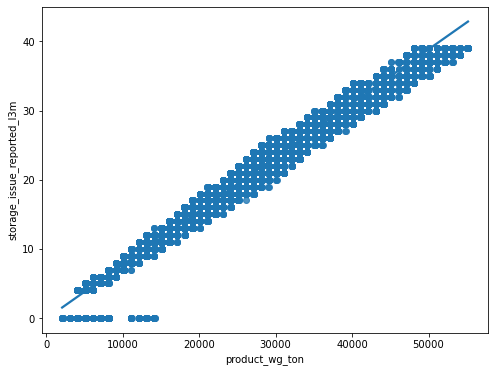

In [477]:
plt.figure(figsize=(8,6))
sns.regplot(df['product_wg_ton'],df['storage_issue_reported_l3m'], ci=None)

Text(0, 0.5, 'Actual Value')

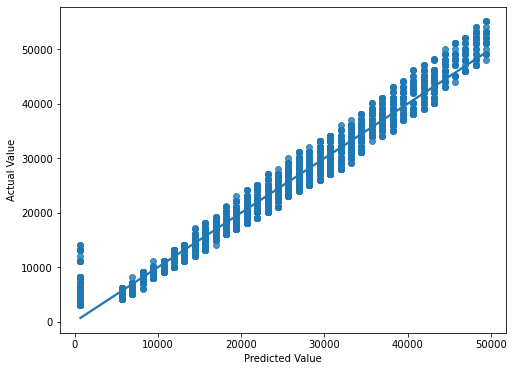

In [484]:
plt.figure(figsize=(8,6))
sns.regplot(y_pred_test,y_test2,ci=None)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [ ]:
### All the above approaches says that out model is just dependent on 1 feature.
### The same thing was also justified by the correlation matrix as storage_issue _reported_l3m column
### was having a correlation coefficient of 0.99 with the target variable product_wg_ton.
### So now we will drop this valriable andtry to build our model.

In [191]:
print(X.shape)
X.head()

(25000, 25)


WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                 0                   3                    1   
1                 2                   0                    0   
2                 1                   1                    0   
3                 1                   7                    4   
4                 2                   3                    1   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                  2             4651               24               0   
1                  4             6217               47               0   
2                  4             4306               64               0   
3                  2             6000               50               0   
4                  2             4740               42               1   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0            1                1             91         29.0   
1            0                1            210         31.0   
2            0                0            161         37.0   
3            0                0            103         21.0   
4            0                1            112         25.0   

   storage_issue_reported_l3m  temp_reg_mach  approved_wh_govt_certificate  \
0                          13              0                             3   
1                           4              0                             3   
2                          17              0                             3   
3                          17              1                             4   
4                          18              0                             0   

   wh_breakdown_l3m  govt_check_l3m  Location_type_Rural  zone_East  \
0                 5              15                    0          0   
1                 3              17                    1          0   
2                 6              22                    1          0   
3                 3              27                    1          0   
4                 6              24                    1          0   

   zone_North  zone_South  WH_regional_zone_Zone 1  WH_regional_zone_Zone 2  \
0           0           0                        0                        0   
1           1           0                        0                        0   
2           0           1                        0                        1   
3           1           0                        0                        0   
4           1           0                        0                        0   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  
0                        0                        0                        0  
1                        0                        0                        1  
2                        0                        0                        0  
3                        1                        0                        0  
4                        0                        0                        1

In [228]:
X3=X.copy()

In [229]:
X3.drop('storage_issue_reported_l3m',axis=1,inplace=True)

In [230]:
print(X3.shape)
X3.head()

(25000, 24)


WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                 0                   3                    1   
1                 2                   0                    0   
2                 1                   1                    0   
3                 1                   7                    4   
4                 2                   3                    1   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                  2             4651               24               0   
1                  4             6217               47               0   
2                  4             4306               64               0   
3                  2             6000               50               0   
4                  2             4740               42               1   

   flood_proof  electric_supply  dist_from_hub  workers_num  temp_reg_mach  \
0            1                1             91         29.0              0   
1            0                1            210         31.0              0   
2            0                0            161         37.0              0   
3            0                0            103         21.0              1   
4            0                1            112         25.0              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             3                 5              15   
1                             3                 3              17   
2                             3                 6              22   
3                             4                 3              27   
4                             0                 6              24   

   Location_type_Rural  zone_East  zone_North  zone_South  \
0                    0          0           0           0   
1                    1          0           1           0   
2                    1          0           0           1   
3                    1          0           1           0   
4                    1          0           1           0   

   WH_regional_zone_Zone 1  WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        1                        0   
3                        0                        0                        1   
4                        0                        0                        0   

   WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  
0                        0                        0  
1                        0                        1  
2                        0                        0  
3                        0                        0  
4                        0                        1

In [231]:
# We will do statndardization as regression models gets affected by weights
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(X3)
x_scaled

array([[-1.63254736, -0.41780748,  0.18869048, ..., -0.36090166,
        -0.44781452, -0.47403559],
       [ 1.05627825, -1.56874998, -0.64504266, ..., -0.36090166,
        -0.44781452,  2.10954623],
       [-0.28813455, -1.18510248, -0.64504266, ..., -0.36090166,
        -0.44781452, -0.47403559],
       ...,
       [ 1.05627825,  1.11678253, -0.64504266, ..., -0.36090166,
        -0.44781452,  2.10954623],
       [-1.63254736, -1.18510248, -0.64504266, ..., -0.36090166,
        -0.44781452, -0.47403559],
       [-0.28813455,  1.50043003,  1.02242363, ..., -0.36090166,
         2.23306741, -0.47403559]])

In [232]:
# Check for multicollienearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaled
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]
vif['Features'] = X3.columns
vif
# as all are less then 5 we can say there is no multicolinearity.

Variance Inflation Factor                      Features
0                    2.266281              WH_capacity_size
1                    1.080186            num_refill_req_l3m
2                    1.001642           transport_issue_l1y
3                    1.278542             Competitor_in_mkt
4                    1.041946               retail_shop_num
5                    1.000796               distributor_num
6                    1.050892                flood_impacted
7                    1.022396                   flood_proof
8                    1.153057               electric_supply
9                    1.001119                 dist_from_hub
10                   1.140889                   workers_num
11                   1.181076                 temp_reg_mach
12                   1.129340  approved_wh_govt_certificate
13                   1.033530              wh_breakdown_l3m
14                   1.337134                govt_check_l3m
15                   1.003733           Location_type_Rural
16                   1.097057                     zone_East
17                   1.578191                    zone_North
18                   1.736362                    zone_South
19                   1.737550       WH_regional_zone_Zone 1
20                   1.292174       WH_regional_zone_Zone 2
21                   1.341669       WH_regional_zone_Zone 3
22                   1.455521       WH_regional_zone_Zone 4
23                   1.581352       WH_regional_zone_Zone 5

In [233]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.2,random_state=101)

In [199]:
from sklearn.linear_model import LinearRegression
linear_model3=LinearRegression()
linear_model3.fit(x_train,y_train)


print('Linear Model Coefficient is:',linear_model3.coef_)
print('Linear Model Intercept is:',linear_model3.intercept_)

Linear Model Coefficient is: [   48.21486721  -138.96944968 -2069.36572871     8.65729014
   -59.1135025     74.21268905   -81.6102645     19.7023977
    24.20090557   -48.56447156    15.5567508    465.57064045
  1961.1788829   3616.34999334   -79.19610992  -680.28753723
   127.50552822   174.14706287    -9.99628438     9.91600216
   169.2794359    -11.11544607    81.15868787   -34.63141306]
Linear Model Intercept is: 22128.2505428247


In [201]:
coef = pd.DataFrame(linear_model3.coef_, X3.columns, columns = ['Coefficients'])
coef

Coefficients
WH_capacity_size                 48.214867
num_refill_req_l3m             -138.969450
transport_issue_l1y           -2069.365729
Competitor_in_mkt                 8.657290
retail_shop_num                 -59.113502
distributor_num                  74.212689
flood_impacted                  -81.610264
flood_proof                      19.702398
electric_supply                  24.200906
dist_from_hub                   -48.564472
workers_num                      15.556751
temp_reg_mach                   465.570640
approved_wh_govt_certificate   1961.178883
wh_breakdown_l3m               3616.349993
govt_check_l3m                  -79.196110
Location_type_Rural            -680.287537
zone_East                       127.505528
zone_North                      174.147063
zone_South                       -9.996284
WH_regional_zone_Zone 1           9.916002
WH_regional_zone_Zone 2         169.279436
WH_regional_zone_Zone 3         -11.115446
WH_regional_zone_Zone 4          81.158688
WH_regional_zone_Zone 5         -34.631413

In [203]:
# Predict the train_data
y_pred_train=linear_model3.predict(x_train)

# Check the R2 value
from sklearn.metrics import r2_score
print(r2_score(y_train,y_pred_train))

# Predict the test data
y_pred=linear_model3.predict(x_test)

# Check the R2 value
print(r2_score(y_test,y_pred))

0.1876103501012808
0.17100729758819389


In [204]:
# Chheck with OLS method as it gives more statistical details. Its there in the statsmodel Package
# Unlike sklearn that adds an intercept to our data for the best fit,statsmodel doesn't.
# We need to add it ourselves. Remember, we want to predict the weight based on our features
# X represnts our predictor variable and y is our predicted variable.
# we need now to add the intercepts manually
import statsmodels.api as sm
x_endog=sm.add_constant(x_train)

res=sm.OLS(y_train,x_endog)
res.fit()

res.fit().summary()
# R2 value is coming to be 18.8% which is very low
# Adj R2 value is coming to be 97.7
# So our model acuracy is very good

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     192.2
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:35:48   Log-Likelihood:            -2.1348e+05
No. Observations:               20000   AIC:                         4.270e+05
Df Residuals:                   19975   BIC:                         4.272e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.213e+04     74.004    299.014      0.000     2.2e+04    2.23e+04
x1            48.2149    111.572      0.432      0.666    -170.475     266.905
x2          -138.9694     76.735     -1.811      0.070    -289.377      11.438
x3         -2069.3657     73.738    -28.064      0.000   -2213.899   -1924.832
x4             8.6573     83.940      0.103      0.918    -155.873     173.187
x5           -59.1135     75.143     -0.787      0.431    -206.400      88.173
x6            74.2127     74.091      1.002      0.317     -71.013     219.438
x7           -81.6103     76.283     -1.070      0.285    -231.131      67.911
x8            19.7024     75.924      0.260      0.795    -129.115     168.520
x9            24.2009     79.715      0.304      0.761    -132.047     180.449
x10          -48.5645     73.834     -0.658      0.511    -193.286      96.157
x11           15.5568     79.599      0.195      0.845    -140.465     171.578
x12          465.5706     80.374      5.793      0.000     308.031     623.110
x13         1961.1789     78.761     24.900      0.000    1806.801    2115.556
x14         3616.3500     75.488     47.906      0.000    3468.387    3764.313
x15          -79.1961     85.350     -0.928      0.353    -246.489      88.097
x16         -680.2875     74.049     -9.187      0.000    -825.430    -535.145
x17          127.5055     76.411      1.669      0.095     -22.266     277.277
x18          174.1471     93.163      1.869      0.062      -8.461     356.755
x19           -9.9963     97.591     -0.102      0.918    -201.284     181.291
x20            9.9160     97.724      0.101      0.919    -181.630     201.462
x21          169.2794     84.375      2.006      0.045       3.897     334.662
x22          -11.1154     85.872     -0.129      0.897    -179.431     157.200
x23           81.1587     89.242      0.909      0.363     -93.762     256.080
x24          -34.6314     93.031     -0.372      0.710    -216.980     147.717
==============================================================================
Omnibus:                      659.863   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              682.312
Skew:                           0.429   Prob(JB):                    6.88e-149
Kurtosis:                       2.710   Cond. No.                         2.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
# We will drop the insignificant columns on the basis of OLS
X3.columns

Index(['WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'temp_reg_mach', 'approved_wh_govt_certificate',
       'wh_breakdown_l3m', 'govt_check_l3m', 'Location_type_Rural',
       'zone_East', 'zone_North', 'zone_South', 'WH_regional_zone_Zone 1',
       'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3',
       'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5'],
      dtype='object')

In [206]:
X3.drop(columns=['WH_capacity_size', 'num_refill_req_l3m','retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'temp_reg_mach', 'zone_South', 'WH_regional_zone_Zone 1','WH_regional_zone_Zone 3',
       'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5'],inplace=True,axis=1)

In [207]:
X3.head()

transport_issue_l1y  Competitor_in_mkt  approved_wh_govt_certificate  \
0                    1                  2                             3   
1                    0                  4                             3   
2                    0                  4                             3   
3                    4                  2                             4   
4                    1                  2                             0   

   wh_breakdown_l3m  govt_check_l3m  Location_type_Rural  zone_East  \
0                 5              15                    0          0   
1                 3              17                    1          0   
2                 6              22                    1          0   
3                 3              27                    1          0   
4                 6              24                    1          0   

   zone_North  WH_regional_zone_Zone 2  
0           0                        0  
1           1                        0  
2           0                        1  
3           1                        0  
4           1                        0

In [208]:
# We will do statndardization as regression models gets affected by weights
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(X3)
x_scaled


# Check for multicollienearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaled
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]
vif['Features'] = X3.columns
vif
# as all are less then 5 we can say there is no multicolinearity.

Variance Inflation Factor                      Features
0                   1.000423           transport_issue_l1y
1                   1.077239             Competitor_in_mkt
2                   1.030892  approved_wh_govt_certificate
3                   1.032909              wh_breakdown_l3m
4                   1.021566                govt_check_l3m
5                   1.002951           Location_type_Rural
6                   1.082373                     zone_East
7                   1.039546                    zone_North
8                   1.018257       WH_regional_zone_Zone 2

In [210]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.2,random_state=101)


from sklearn.linear_model import LinearRegression
linear_model4=LinearRegression()
linear_model4.fit(x_train,y_train)


print('Linear Model Coefficient is:',linear_model4.coef_)
print('Linear Model Intercept is:',linear_model4.intercept_)

coef = pd.DataFrame(linear_model4.coef_, X3.columns, columns = ['Coefficients'])
coef

Linear Model Coefficient is: [-2061.57743721    27.6636981   2095.41683913  3622.15494576
   -58.09068644  -687.02577154   124.51842056   170.73300657
   158.88949223]
Linear Model Intercept is: 22128.946214134772


Coefficients
transport_issue_l1y           -2061.577437
Competitor_in_mkt                27.663698
approved_wh_govt_certificate   2095.416839
wh_breakdown_l3m               3622.154946
govt_check_l3m                  -58.090686
Location_type_Rural            -687.025772
zone_East                       124.518421
zone_North                      170.733007
WH_regional_zone_Zone 2         158.889492

In [ ]:
# Predict the train_data
y_pred_train=linear_model4.predict(x_train)

# Check the R2 value
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

# Predict the test data
y_pred=linear_model4.predict(x_test)

# Check the R2 value
r2_score(y_test,y_pred)

In [214]:
# Chheck with OLS method as it gives more statistical details. Its there in the statsmodel Package
# Unlike sklearn that adds an intercept to our data for the best fit,statsmodel doesn't.
# We need to add it ourselves. Remember, we want to predict the weight based on our features
# X represnts our predictor variable and y is our predicted variable.
# we need now to add the intercepts manually
import statsmodels.api as sm
x_endog=sm.add_constant(x_train)

res=sm.OLS(y_train,x_endog)
res.fit()

res.fit().summary()
# R2 value is coming to be 97.7%
# Adj R2 value is coming to be 97.7
# So our model acuracy is very good

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     507.7
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:43:22   Log-Likelihood:            -2.1350e+05
No. Observations:               20000   AIC:                         4.270e+05
Df Residuals:                   19990   BIC:                         4.271e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.213e+04     74.040    298.879      0.000     2.2e+04    2.23e+04
x1         -2061.5774     73.715    -27.967      0.000   -2206.064   -1917.091
x2            27.6637     77.056      0.359      0.720    -123.372     178.699
x3          2095.4168     75.243     27.849      0.000    1947.935    2242.899
x4          3622.1549     75.498     47.977      0.000    3474.173    3770.136
x5           -58.0907     74.606     -0.779      0.436    -204.325      88.144
x6          -687.0258     74.067     -9.276      0.000    -832.204    -541.848
x7           124.5184     75.914      1.640      0.101     -24.279     273.316
x8           170.7330     75.477      2.262      0.024      22.793     318.673
x9           158.8895     74.848      2.123      0.034      12.180     305.599
==============================================================================
Omnibus:                      667.599   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.064
Skew:                           0.436   Prob(JB):                    4.31e-152
Kurtosis:                       2.723   Cond. No.                         1.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Use regularization techniques to imporve accuracy

In [215]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [224]:
ridge_reg = Ridge(alpha=.1)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)
print ("Ridge model:", (ridge_reg.coef_))
print("Ridge model Accuracy:",r2_score(y_test, y_pred_ridge))

Ridge model: [-2061.56692658    27.66395275  2095.40941035  3622.13803658
   -58.09049597  -687.02334237   124.51752182   170.73179608
   158.88868249]
Ridge model Accuracy: 0.17015703476183142


In [227]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
y_pred_lasso = lasso_reg.predict(x_test)
print ("Lasso model:", (lasso_reg.coef_))
print("Lasso model Accuracy:",r2_score(y_test, y_pred_lasso))

print('*******************************************************************')
elastic_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_reg.fit(x_train, y_train)
y_pred_elastic = elastic_reg.predict(x_test)
print ("elastic-net model:", (elastic_reg.coef_))
print("elastic-net model accuracy:",r2_score(y_test, y_pred_elastic))

Lasso model: [-2061.47671353    27.5798619   2095.33394467  3622.07412941
   -57.97959958  -686.932961     124.41435266   170.59173522
   158.77003631]
Lasso model Accuracy: 0.17015814988600575
*******************************************************************
elastic-net model: [-1961.50864439    29.85892083  2023.30993178  3460.77620906
   -56.21715036  -663.44742395   116.09193089   159.30096817
   151.14183678]
elastic-net model accuracy: 0.1702617527521697


In [238]:
ridge_reg = Ridge(alpha=.1)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)
print ("Ridge model:", (ridge_reg.coef_))
print("Ridge model Accuracy:",r2_score(y_test, y_pred_ridge))

print('*******************************************************************')

lasso_reg = Lasso(alpha=.1)
lasso_reg.fit(x_train, y_train)
y_pred_lasso = lasso_reg.predict(x_test)
print ("Lasso model:", (lasso_reg.coef_))
print("Lasso model Accuracy:",r2_score(y_test, y_pred_lasso))

print('*******************************************************************')

# elastic_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
# elastic_reg.fit(x_train, y_train)
# y_pred_elastic = elastic_reg.predict(x_test)
# print ("elastic-net model:", (elastic_reg.coef_))
# print("elastic-net model accuracy:",r2_score(y_test, y_pred_elastic))

Ridge model: [   48.21397241  -138.96904333 -2069.35518784     8.65740396
   -59.11320098    74.21221185   -81.60947985    19.70211536
    24.20079368   -48.56438913    15.55625193   465.57117574
  1961.17197391  3616.33297852   -79.19526166  -680.28511413
   127.50452206   174.14519775    -9.99723675     9.91495376
   169.27823547   -11.11578371    81.15741708   -34.63137436]
Ridge model Accuracy: 0.17100734692675812
*******************************************************************
Lasso model: [   47.72249063  -138.8433154  -2069.26731092     8.57133377
   -59.03863692    74.10983842   -81.46370044    19.59896364
    24.12298023   -48.47393246    15.46064051   465.45517042
  1961.12843181  3616.26930069   -78.91441122  -680.19723082
   127.37874864   173.977958     -10.0732588      9.52694026
   169.06706538   -11.17449084    80.88934669   -34.40656171]
Lasso model Accuracy: 0.17101054700985352
*******************************************************************


### Polynomial Regression

In [245]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly_train = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
pol_reg.fit(x_poly_train, y_train)


LinearRegression()

In [246]:
y_pred_poly=pol_reg.predict(poly_reg.fit_transform(x_test))

In [247]:
# Check the R2 value
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_poly))
# Still very bad accuracy.

0.216022956787004


## XGBoost

In [248]:
import xgboost

In [250]:
from xgboost import XGBRegressor

In [251]:
model = XGBRegressor()

In [255]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

In [256]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=101)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 8338.084 (151.529)


In [259]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [260]:
y_pred=model.predict(x_test)

In [262]:
r2_score(y_test,y_pred)   # Still very bad accuracy

0.1970491794282857

In [ ]:
### We will try other regression model 

## Random Forest Regressor

In [269]:
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.model_selection import GridSearchCV

In [278]:
## Define Grid 
start = time.time()
grid = { 
    'n_estimators': [700,1000,1500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [6,7,8,9],
    'random_state' : [18]
}
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 10) ## Grid Search function
CV_rfr.fit(x_train, y_train)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))
print('Best Parameters using grid search: \n', CV_rfr.best_params_)

Time taken in grid search:  6937.13


In [279]:
print('Best Parameters using grid search: \n', CV_rfr.best_params_)

Best Parameters using grid search: 
 {'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 1500, 'random_state': 18}


In [280]:
rf = RandomForestRegressor(n_estimators = 700, max_features = 'sqrt', max_depth = 9, random_state = 18)
rf.fit(x_train, y_train)
# Predict on test data
prediction = rf.predict(x_test)
# Compute mean squared error
#mse = mean_squared_error(y_test, prediction)
# Print results
#print(mse)
#print(mse^.5)
print(r2_score(y_test,prediction))
## Accuracy is very very low

0.22643363295931895


###  PCA 

In [485]:
X.columns

Index(['WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'Location_type_Rural', 'zone_East', 'zone_North', 'zone_South',
       'WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5'],
      dtype='object')

In [486]:
from sklearn.decomposition import PCA 

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(X)
x_scaled

array([[-1.63254736, -0.41780748,  0.18869048, ..., -0.36090166,
        -0.44781452, -0.47403559],
       [ 1.05627825, -1.56874998, -0.64504266, ..., -0.36090166,
        -0.44781452,  2.10954623],
       [-0.28813455, -1.18510248, -0.64504266, ..., -0.36090166,
        -0.44781452, -0.47403559],
       ...,
       [ 1.05627825,  1.11678253, -0.64504266, ..., -0.36090166,
        -0.44781452,  2.10954623],
       [-1.63254736, -1.18510248, -0.64504266, ..., -0.36090166,
        -0.44781452, -0.47403559],
       [-0.28813455,  1.50043003,  1.02242363, ..., -0.36090166,
         2.23306741, -0.47403559]])

In [487]:
pca=PCA(n_components=5)
pca.fit(x_scaled)
X_pca=pca.transform(x_scaled)
#lets check the shape of X_pca arrat
print('shape of X_pca',X_pca.shape)

shape of X_pca (25000, 5)


In [488]:
X_pca

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio=ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.24212838 0.20539319 0.19661141 0.1851798  0.17068722]


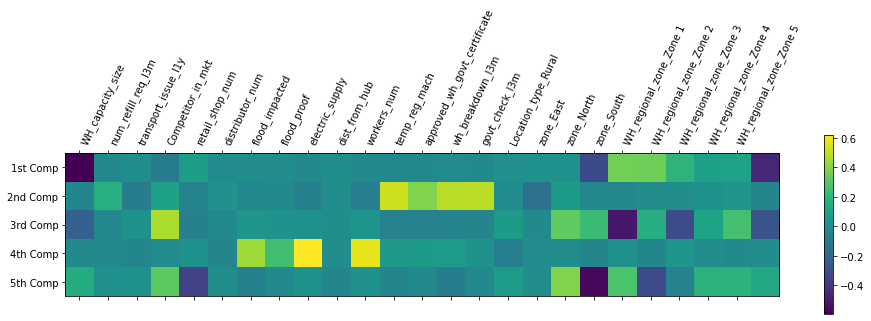

In [489]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],['1st Comp','2nd Comp','3rd Comp','4th Comp','a','b','a','b','a','b','a','b','a','b','a'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X3.columns)),X3.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()

In [344]:
x_train_n,x_test_n,y_train_n,y_test_n=train_test_split(X_pca,Y,test_size=0.2,random_state=101)

In [345]:
from sklearn.linear_model import LinearRegression
linear_model_n=LinearRegression()
linear_model_n.fit(x_train_n,y_train_n)

LinearRegression()

In [346]:
# Predict the train_data
y_pred_train_n=linear_model_n.predict(x_train_n)

# Check the R2 value
from sklearn.metrics import r2_score
print(r2_score(y_train_n,y_pred_train_n))

# Predict the test data
y_pred_n=linear_model_n.predict(x_test_n)

# Check the R2 value
r2_score(y_test_n,y_pred_n)

0.07162771738129847


0.06093788149736834

In [348]:
x_endog=sm.add_constant(x_train_n)

res=sm.OLS(y_train_n,x_endog)
res.fit()

res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     192.8
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          1.43e-315
Time:                        12:56:44   Log-Likelihood:            -2.1482e+05
No. Observations:               20000   AIC:                         4.296e+05
Df Residuals:                   19991   BIC:                         4.297e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.211e+04     79.070    279.645      0.000     2.2e+04    2.23e+04
x1           -85.8376     56.778     -1.512      0.131    -197.128      25.453
x2            95.6037     62.898      1.520      0.129     -27.681     218.888
x3          -875.2990     64.774    -13.513      0.000   -1002.260    -748.337
x4          2238.1307     65.636     34.099      0.000    2109.479    2366.782
x5          -659.5982     67.246     -9.809      0.000    -791.405    -527.791
x6           168.5134     69.759      2.416      0.016      31.780     305.247
x7           226.7526     72.751      3.117      0.002      84.155     369.350
x8          -657.9848     75.707     -8.691      0.000    -806.378    -509.592
==============================================================================
Omnibus:                      766.175   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              674.875
Skew:                           0.388   Prob(JB):                    2.84e-147
Kurtosis:                       2.544   Cond. No.                         1.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [377]:
# PCA is also not giving good results.

In [378]:
# Other appoaches that were tried: KNN regression, Decision treee regressor, SVM regressor, perceptron model,
#   polynomial regression with multiple degrees
# Tried with one hot encoding, ordinal, encoding , and label encoding and different combinations.
# Tried standardization and normalization approach as well. 
# I also tried the odel without scaling the data and in that case as well accuracy is not increasing.
# But the model accuracy is not improving if we are dropping the storage issue in last 3 months columns.
# So we either need to build the model with that variable or we need to as k the stakeholders 
#   if there is any other data that we can get so we =can improve our model accuracy.